In [36]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("./blog.mplstyle")

DATA_DIR = "../data/"

In [37]:
# test run through

df = pd.read_excel(DATA_DIR + "caiso_2022.xlsx")
df2 = pd.read_excel(DATA_DIR + "caiso_2023.xlsx")
df = pd.concat([df, df2], ignore_index=True)

df

,Date,HR,PGE,SCE,SDGE,VEA,CAISO
0,2022-01-01,1,10194.36000,9931.73000,2084.720000,92.850000,22303.670000
1,2022-01-01,2,9864.37000,9542.54000,1989.790000,94.390000,21491.080000
2,2022-01-01,3,9640.65000,9386.28000,1918.940000,95.850000,21041.720000
3,2022-01-01,4,9811.09000,9136.57000,1831.520000,96.770000,20875.960000
4,2022-01-01,5,9832.34000,9150.23000,1818.130000,100.710000,20901.420000
...,...,...,...,...,...,...,...
17515,2023-12-31,20,11224.37307,11247.71352,2440.556645,77.311291,24989.954840
17516,2023-12-31,21,10912.38022,10964.86264,2347.108757,75.579349,24299.931223
17517,2023-12-31,22,10597.52884,10753.67827,2264.490644,72.632604,23688.330508
17518,2023-12-31,23,10390.07141,10435.09422,2160.481026,71.579279,23057.226048


In [38]:
# add datetime-derived indicators

# hour column is 1-24, convert to 0-23
df["datetime"] = pd.to_datetime(df["Date"]) + pd.to_timedelta(df["HR"] - 1, unit="h")
df["hour"] = df["datetime"].dt.hour
df["dow"] = df["datetime"].dt.dayofweek
df["doy"] = df["datetime"].dt.dayofyear
df["month"] = df["datetime"].dt.month
df["year"] = df["datetime"].dt.year
# weekend indicator
df["is_weekend"] = df["dow"].isin([5, 6]).astype(int)
# df["week"] = df["datetime"].dt.isocalendar().week

In [39]:
# drop unnecessary cols

# convert column names
df = df.rename(
    columns={
        "Date": "date",
        # "HR": "hour_of_day",
        # "Load": "load_mw",
        # "datetime": "datetime",
    }
)

In [40]:
df

,date,HR,PGE,SCE,SDGE,VEA,CAISO,datetime,hour,dow,doy,month,year,is_weekend
0,2022-01-01,1,10194.36000,9931.73000,2084.720000,92.850000,22303.670000,2022-01-01 00:00:00,0,5,1,1,2022,1
1,2022-01-01,2,9864.37000,9542.54000,1989.790000,94.390000,21491.080000,2022-01-01 01:00:00,1,5,1,1,2022,1
2,2022-01-01,3,9640.65000,9386.28000,1918.940000,95.850000,21041.720000,2022-01-01 02:00:00,2,5,1,1,2022,1
3,2022-01-01,4,9811.09000,9136.57000,1831.520000,96.770000,20875.960000,2022-01-01 03:00:00,3,5,1,1,2022,1
4,2022-01-01,5,9832.34000,9150.23000,1818.130000,100.710000,20901.420000,2022-01-01 04:00:00,4,5,1,1,2022,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2023-12-31,20,11224.37307,11247.71352,2440.556645,77.311291,24989.954840,2023-12-31 19:00:00,19,6,365,12,2023,1
17516,2023-12-31,21,10912.38022,10964.86264,2347.108757,75.579349,24299.931223,2023-12-31 20:00:00,20,6,365,12,2023,1
17517,2023-12-31,22,10597.52884,10753.67827,2264.490644,72.632604,23688.330508,2023-12-31 21:00:00,21,6,365,12,2023,1
17518,2023-12-31,23,10390.07141,10435.09422,2160.481026,71.579279,23057.226048,2023-12-31 22:00:00,22,6,365,12,2023,1


In [41]:
df["dow"].unique()

array([5, 6, 0, 1, 2, 3, 4], dtype=int32)

In [42]:
df["is_weekend"].unique()

array([1, 0])

In [88]:
df_2022 = df[df["year"] == 2022].copy()
df_2023 = df[df["year"] == 2023].copy()

In [59]:
df_daily = df.groupby(["date", "dow"])["CAISO"].mean().reset_index()
# add datetime with hour set to 12:00
df_daily["datetime"] = pd.to_datetime(df_daily["date"]) + pd.to_timedelta(12, unit="h")

df_daily

,date,dow,CAISO,datetime
0,2022-01-01,5,22212.745000,2022-01-01 12:00:00
1,2022-01-02,6,22766.911250,2022-01-02 12:00:00
2,2022-01-03,0,24858.160417,2022-01-03 12:00:00
3,2022-01-04,1,24610.302500,2022-01-04 12:00:00
4,2022-01-05,2,24367.203333,2022-01-05 12:00:00
...,...,...,...,...
725,2023-12-27,2,24238.941362,2023-12-27 12:00:00
726,2023-12-28,3,23969.538908,2023-12-28 12:00:00
727,2023-12-29,4,23511.146222,2023-12-29 12:00:00
728,2023-12-30,5,22832.035927,2023-12-30 12:00:00


In [ ]:
df_2022_jan = df[(df["year"] == 2022) & (df["month"] == 1)].copy()
df_2022_march = df[(df["year"] == 2022) & (df["month"] == 3)].copy()
df_2022_july = df[(df["year"] == 2022) & (df["month"] == 7)].copy()

In [46]:
# group by day and get mean
df_2022_jan_daily = df_2022_jan.groupby(["date", "dow"])["CAISO"].mean().reset_index()
# add datetime with hour set to 12:00
df_2022_jan_daily["datetime"] = pd.to_datetime(df_2022_jan_daily["date"]) + pd.to_timedelta(12, unit="h")

df_2022_jan_daily

,date,dow,CAISO,datetime
0,2022-01-01,5,22212.745000,2022-01-01 12:00:00
1,2022-01-02,6,22766.911250,2022-01-02 12:00:00
2,2022-01-03,0,24858.160417,2022-01-03 12:00:00
3,2022-01-04,1,24610.302500,2022-01-04 12:00:00
4,2022-01-05,2,24367.203333,2022-01-05 12:00:00
5,2022-01-06,3,24299.248333,2022-01-06 12:00:00
6,2022-01-07,4,24650.034167,2022-01-07 12:00:00
7,2022-01-08,5,22509.055833,2022-01-08 12:00:00
8,2022-01-09,6,21927.969167,2022-01-09 12:00:00
9,2022-01-10,0,24244.319167,2022-01-10 12:00:00


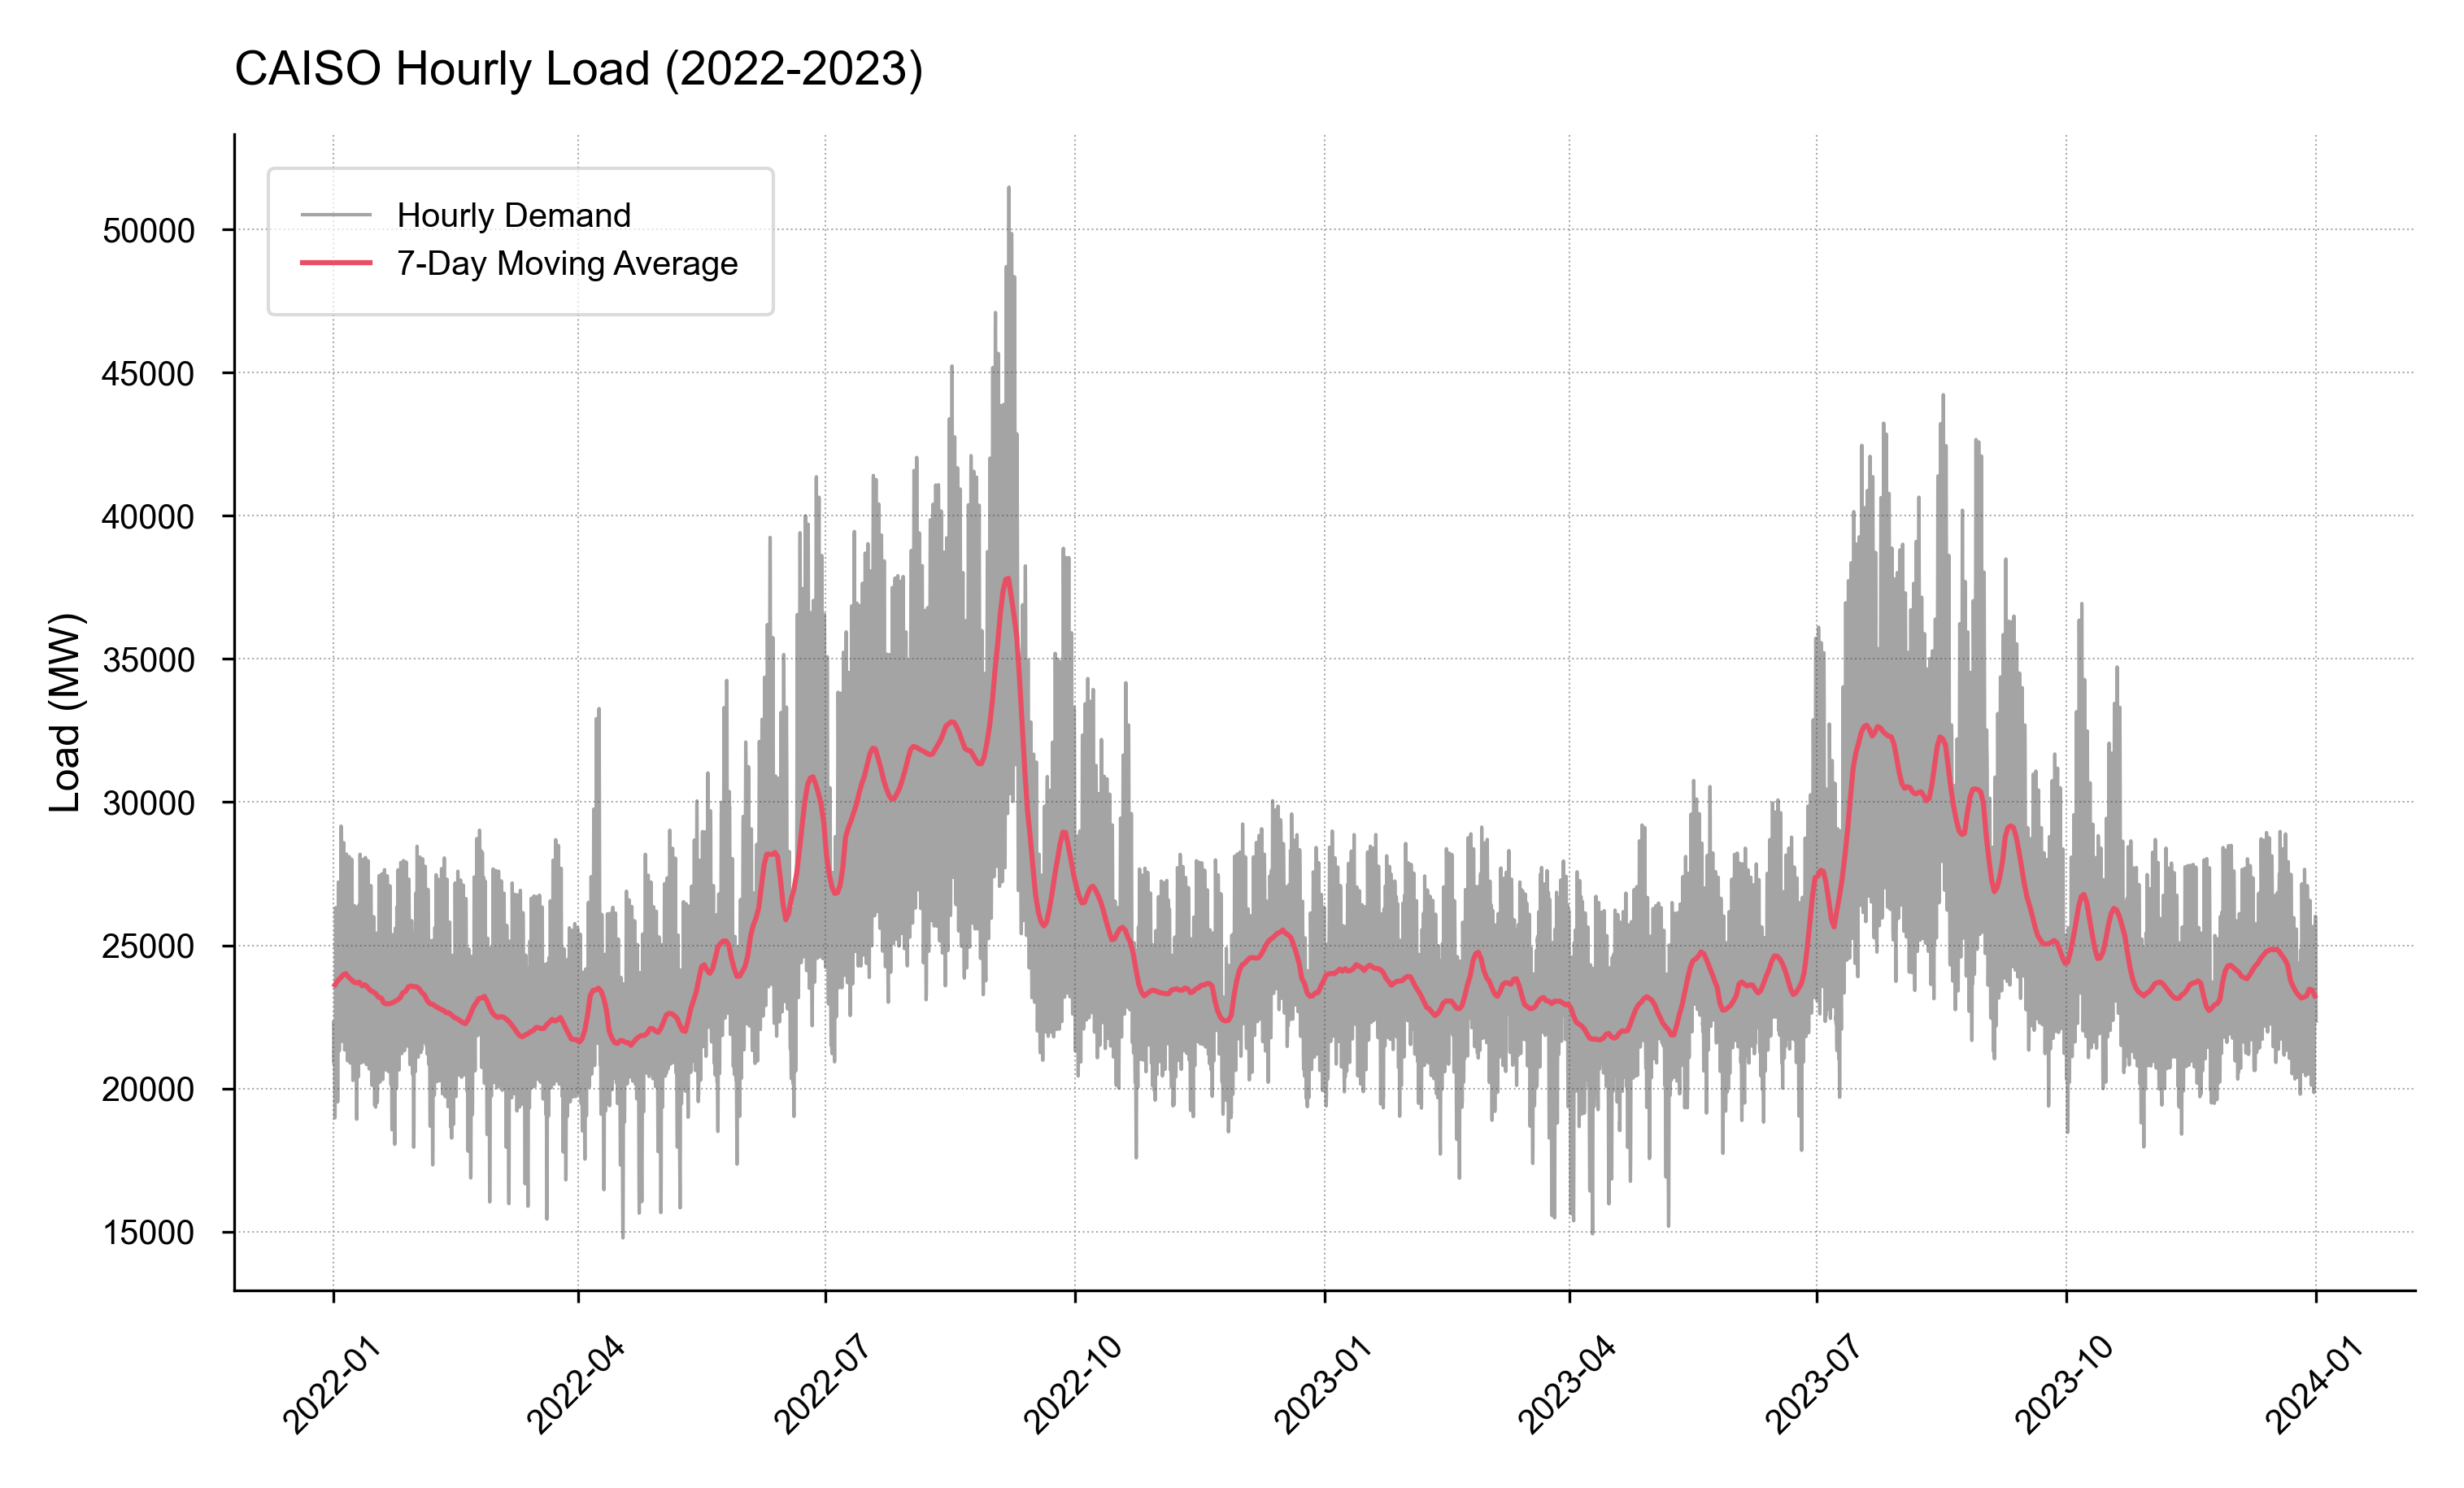

In [79]:
# caclculate centered moving average
df_daily["CAISO_MA"] = df_daily["CAISO"].rolling(window=7, min_periods=1, center=True).mean()

# plot line line chart
plt.figure(figsize=(10, 6))

plt.plot(df["datetime"], df["CAISO"], alpha=0.5, label="Hourly Demand", linewidth=1)
plt.plot(df_daily["datetime"], df_daily["CAISO_MA"], label="7-Day Moving Average", linewidth=1.5)

plt.title("CAISO Hourly Load (2022-2023)", loc="left", fontweight="regular")
# plt.xlabel("Hour")
plt.ylabel("Load (MW)")
plt.xticks(rotation=45)
plt.legend(loc="upper left", frameon=True, fontsize=10, framealpha=0.7, borderpad=1)

plt.show()

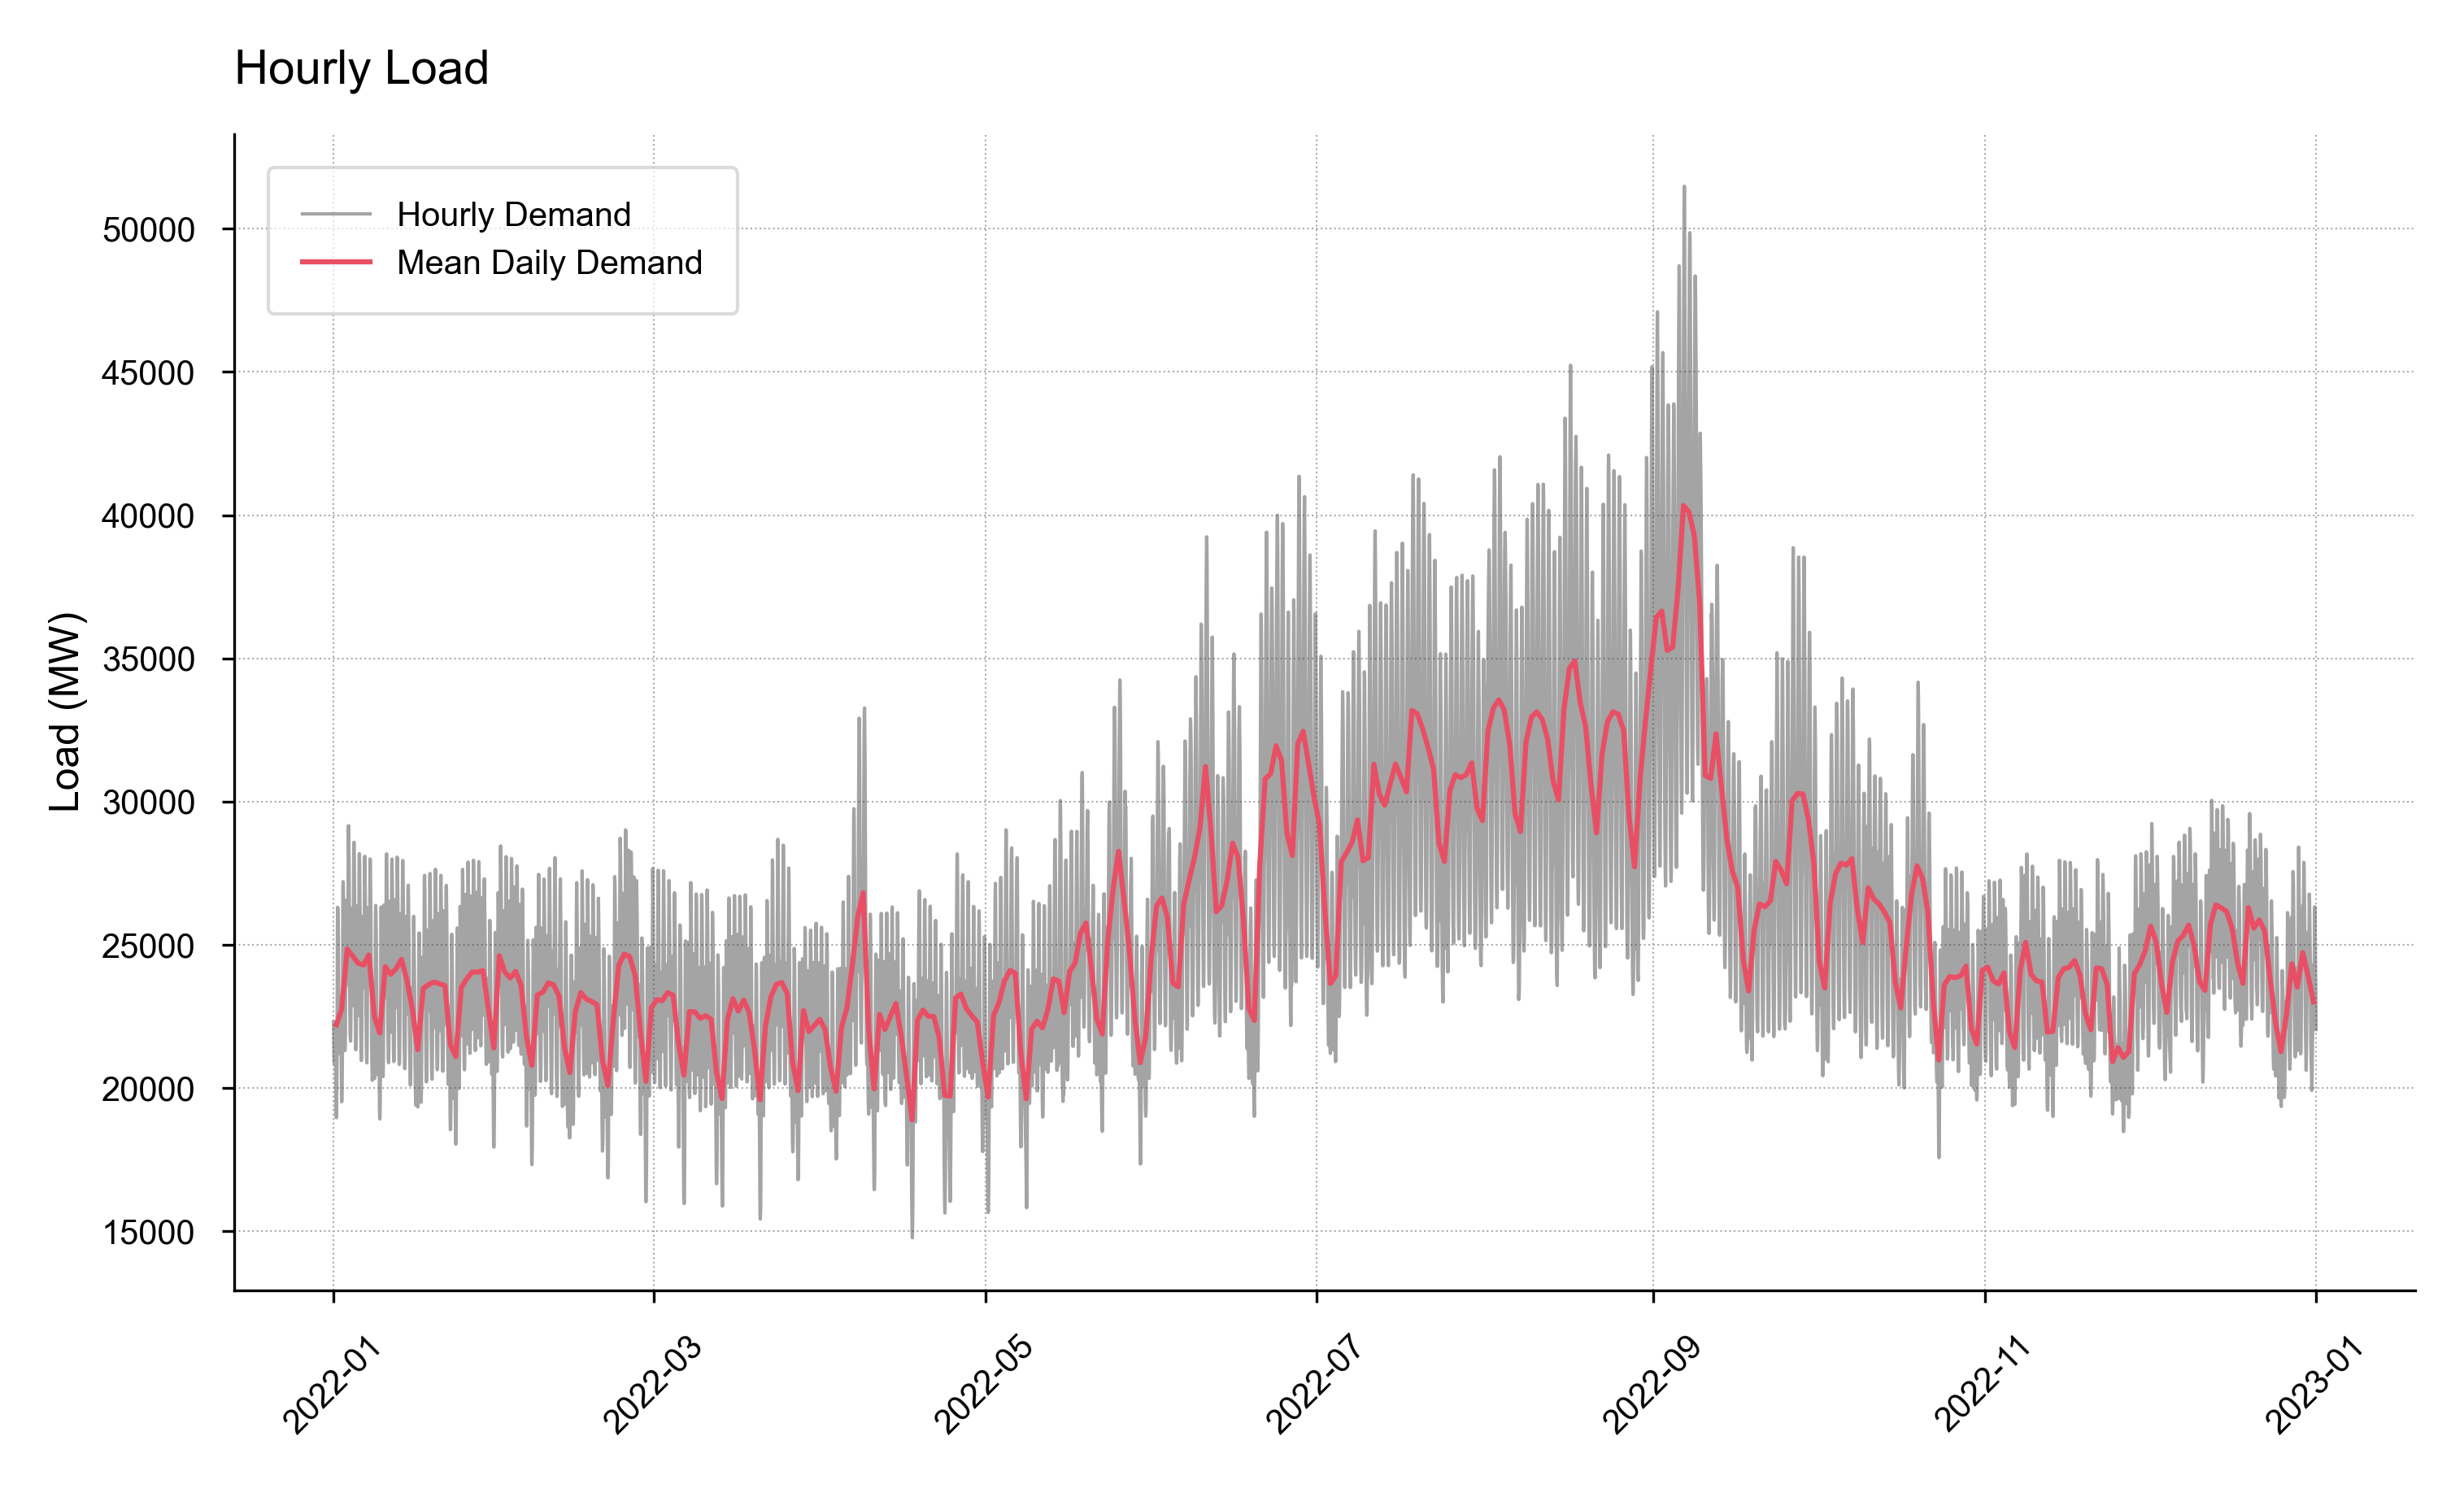

In [80]:
df_2022_daily = df_daily[df_daily["date"].dt.year == 2022].copy()

# plot line line chart
plt.figure(figsize=(10, 6))

plt.plot(df_2022["datetime"], df_2022["CAISO"], alpha=0.5, label="Hourly Demand", linewidth=1)
plt.plot(df_2022_daily["datetime"], df_2022_daily["CAISO"], label="Mean Daily Demand", linewidth=1.5)

plt.title("Hourly Load", loc="left", fontweight="regular")
# plt.xlabel("Hour")
plt.ylabel("Load (MW)")
plt.xticks(rotation=45)
plt.legend(loc="upper left", frameon=True, fontsize=10, framealpha=0.7, borderpad=1)

plt.show()

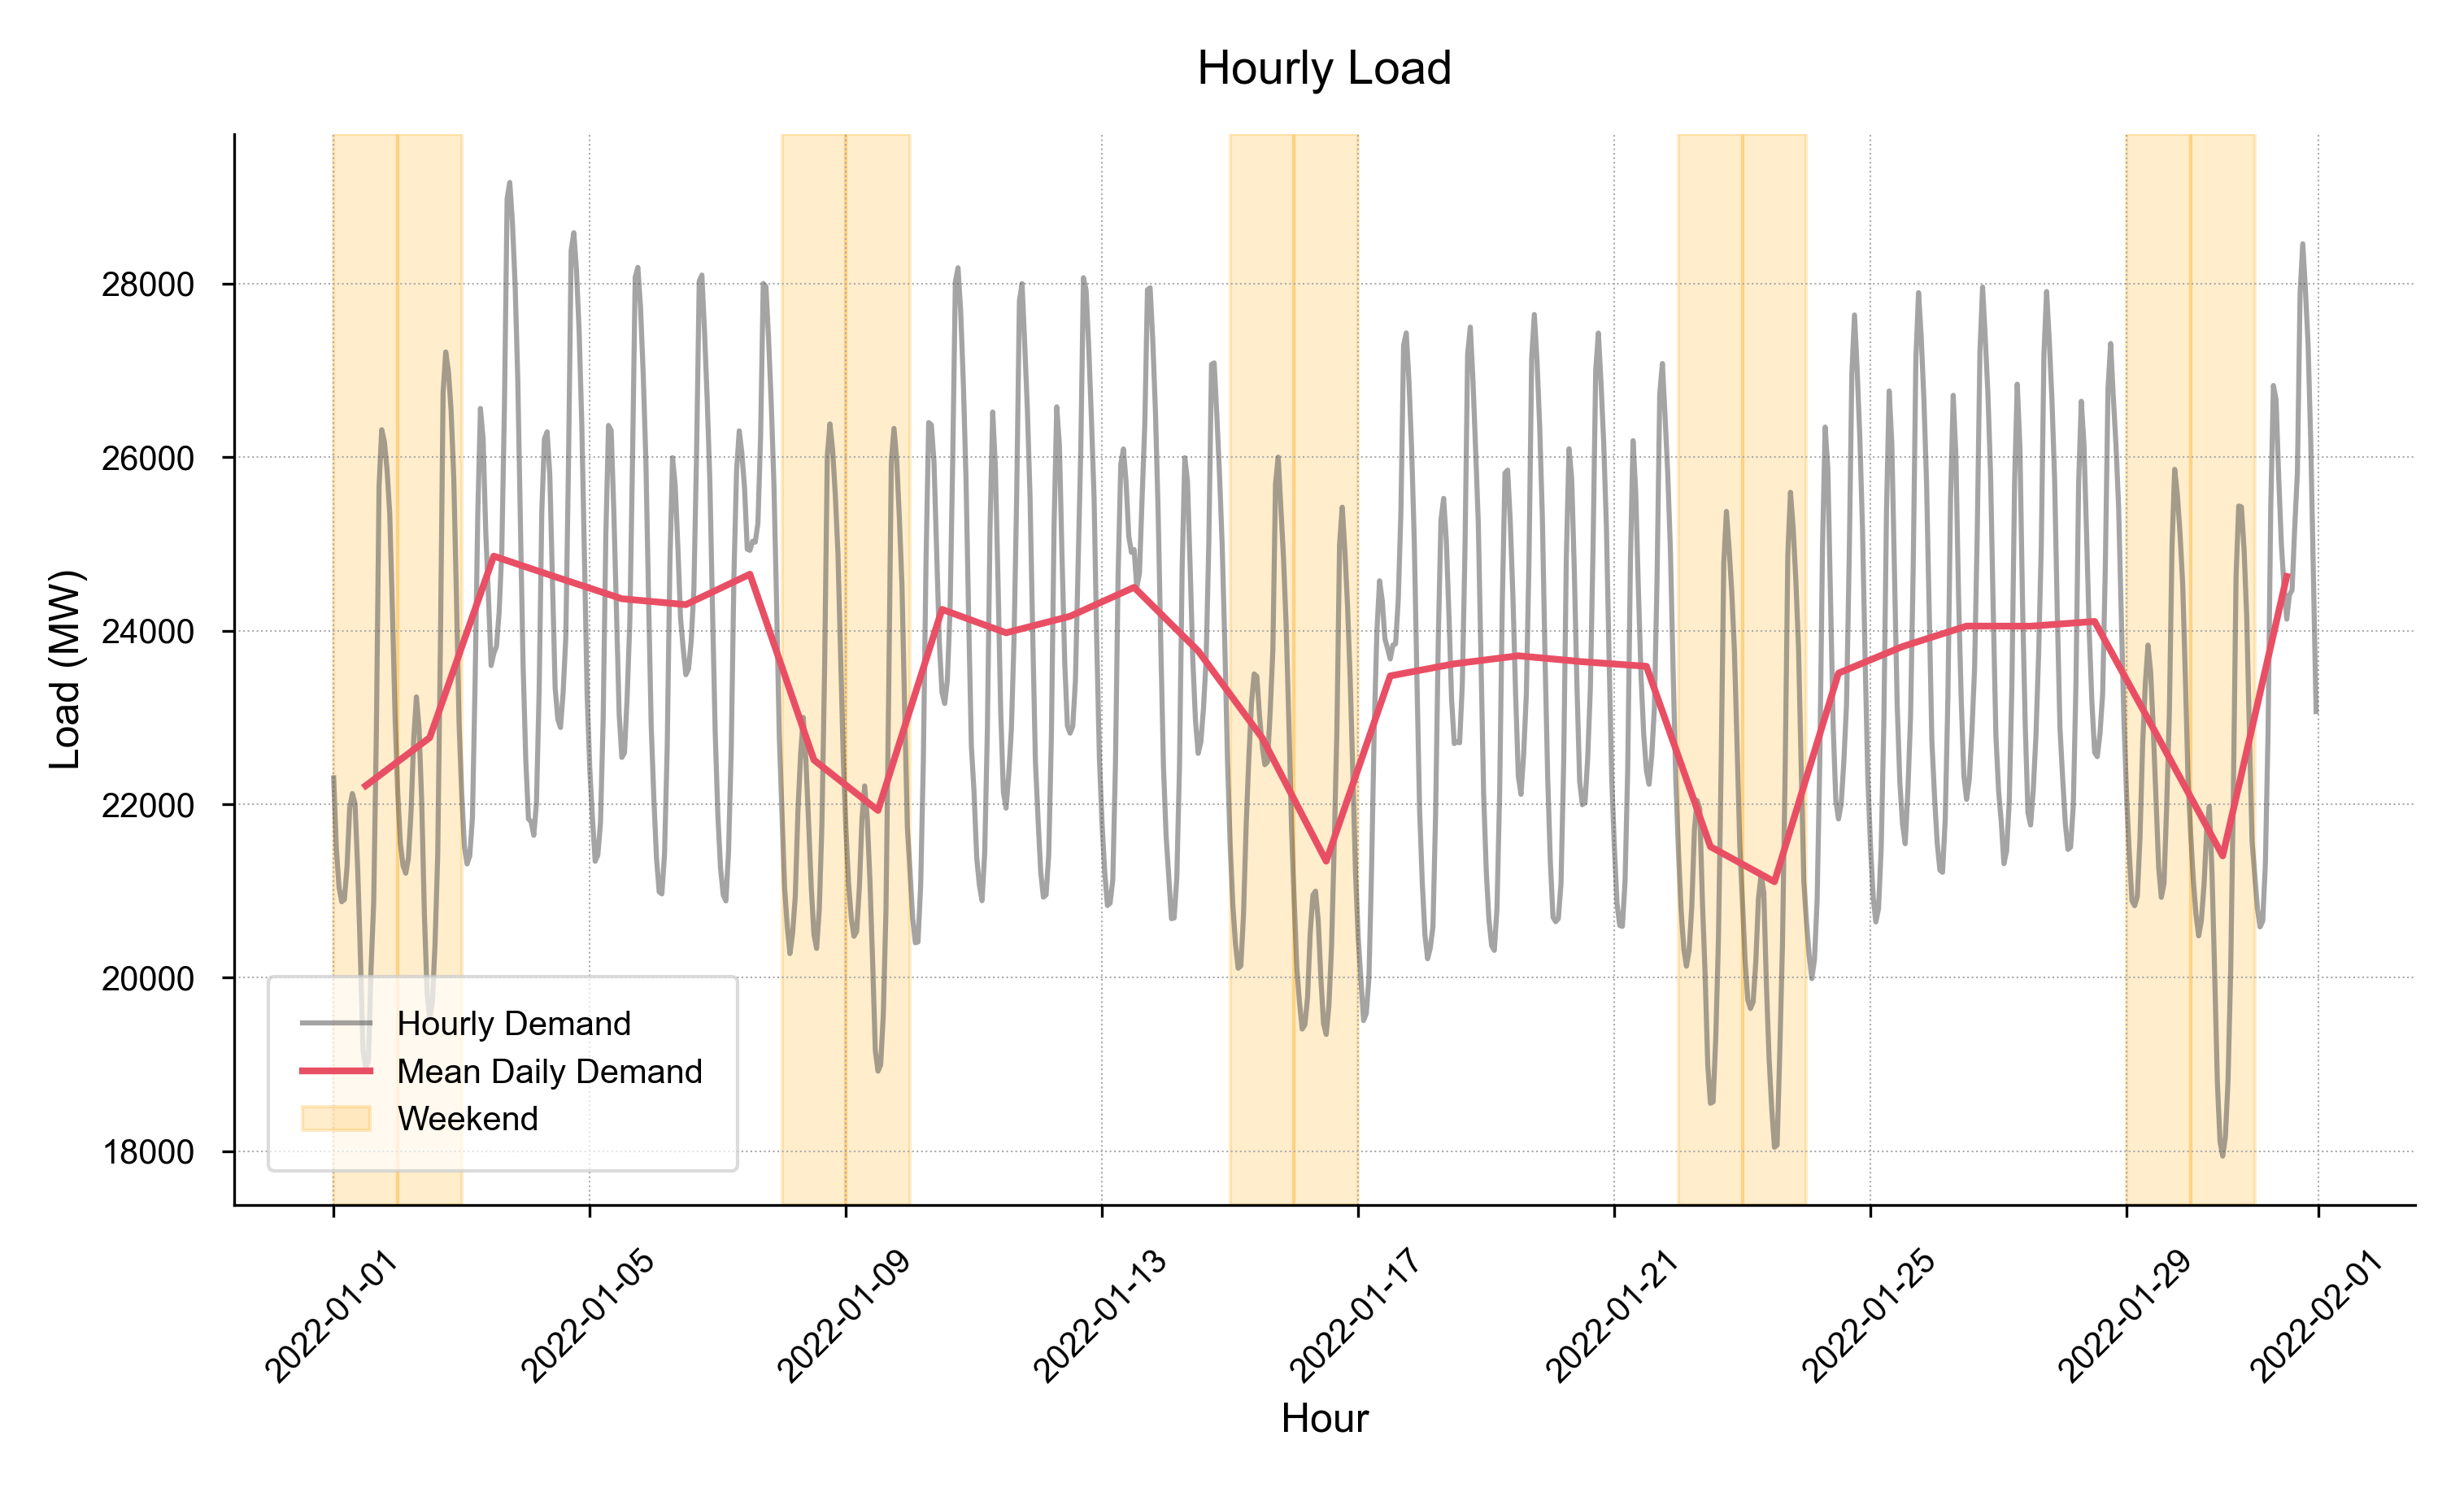

In [93]:
# plot line line chart
plt.figure(figsize=(10, 6))

plt.plot(df_2022_jan["datetime"], df_2022_jan["CAISO"], alpha=0.5, label="Hourly Demand", linewidth=1.5)
plt.plot(df_2022_jan_daily["datetime"], df_2022_jan_daily["CAISO"], label="Mean Daily Demand", linewidth=2)

# highlight weekends
for i in range(len(df_2022_jan_daily)):
    if df_2022_jan_daily["dow"].iloc[i] > 4:  # Saturday or Sunday
        plt.axvspan(df_2022_jan_daily["datetime"].iloc[i] - pd.Timedelta(hours=12),
                    df_2022_jan_daily["datetime"].iloc[i] + pd.Timedelta(hours=12),
                    color="orange", alpha=0.2, label="Weekend" if i == 0 else "")

plt.title("Hourly Load")
plt.xlabel("Hour")
plt.ylabel("Load (MW)")
plt.xticks(rotation=45)
plt.legend(loc="lower left", frameon=True, fontsize=10, framealpha=0.7, borderpad=1)

plt.show()

In [25]:
# # plot line line chart
# plt.figure(figsize=(10, 6))

# plt.scatter(df["hour"], df["CAISO"], alpha=0.2)
# plt.title("Hourly Load Demand")
# plt.xlabel("Hour")
# plt.ylabel("Load (MW)")

# plt.show()


In [26]:
# group by hour calculate mean load
df_2022_hour_avg = df_2022.groupby(["hour"])["CAISO"].mean().reset_index()

df_2022_hour_avg

,hour,CAISO
0,0,23788.834559
1,1,22894.090242
2,2,22298.290706
3,3,21979.155526
4,4,22056.263732
5,5,22813.179399
6,6,24123.045833
7,7,25082.224380
8,8,25455.262241
9,9,25223.858909


In [89]:
# group by hour calculate mean load
df_2023_hour_avg = df_2023.groupby(["hour"])["CAISO"].mean().reset_index()

df_2023_hour_avg

,hour,CAISO
0,0,23691.417435
1,1,22870.799781
2,2,22295.466996
3,3,21958.178216
4,4,21971.244728
5,5,22692.145246
6,6,23926.540285
7,7,24883.800687
8,8,25265.940195
9,9,24927.074944


In [27]:
# group by hour and month and calculate mean load
df_2022_month_avg = df_2022.groupby(["month", "hour"])["CAISO"].mean().reset_index()

df_2022_month_avg

,month,hour,CAISO
0,1,0,21663.323548
1,1,1,21061.476452
2,1,2,20719.545806
3,1,3,20674.869355
4,1,4,21045.448387
...,...,...,...
283,12,19,27339.580968
284,12,20,26802.702581
285,12,21,26080.440968
286,12,22,24783.861935


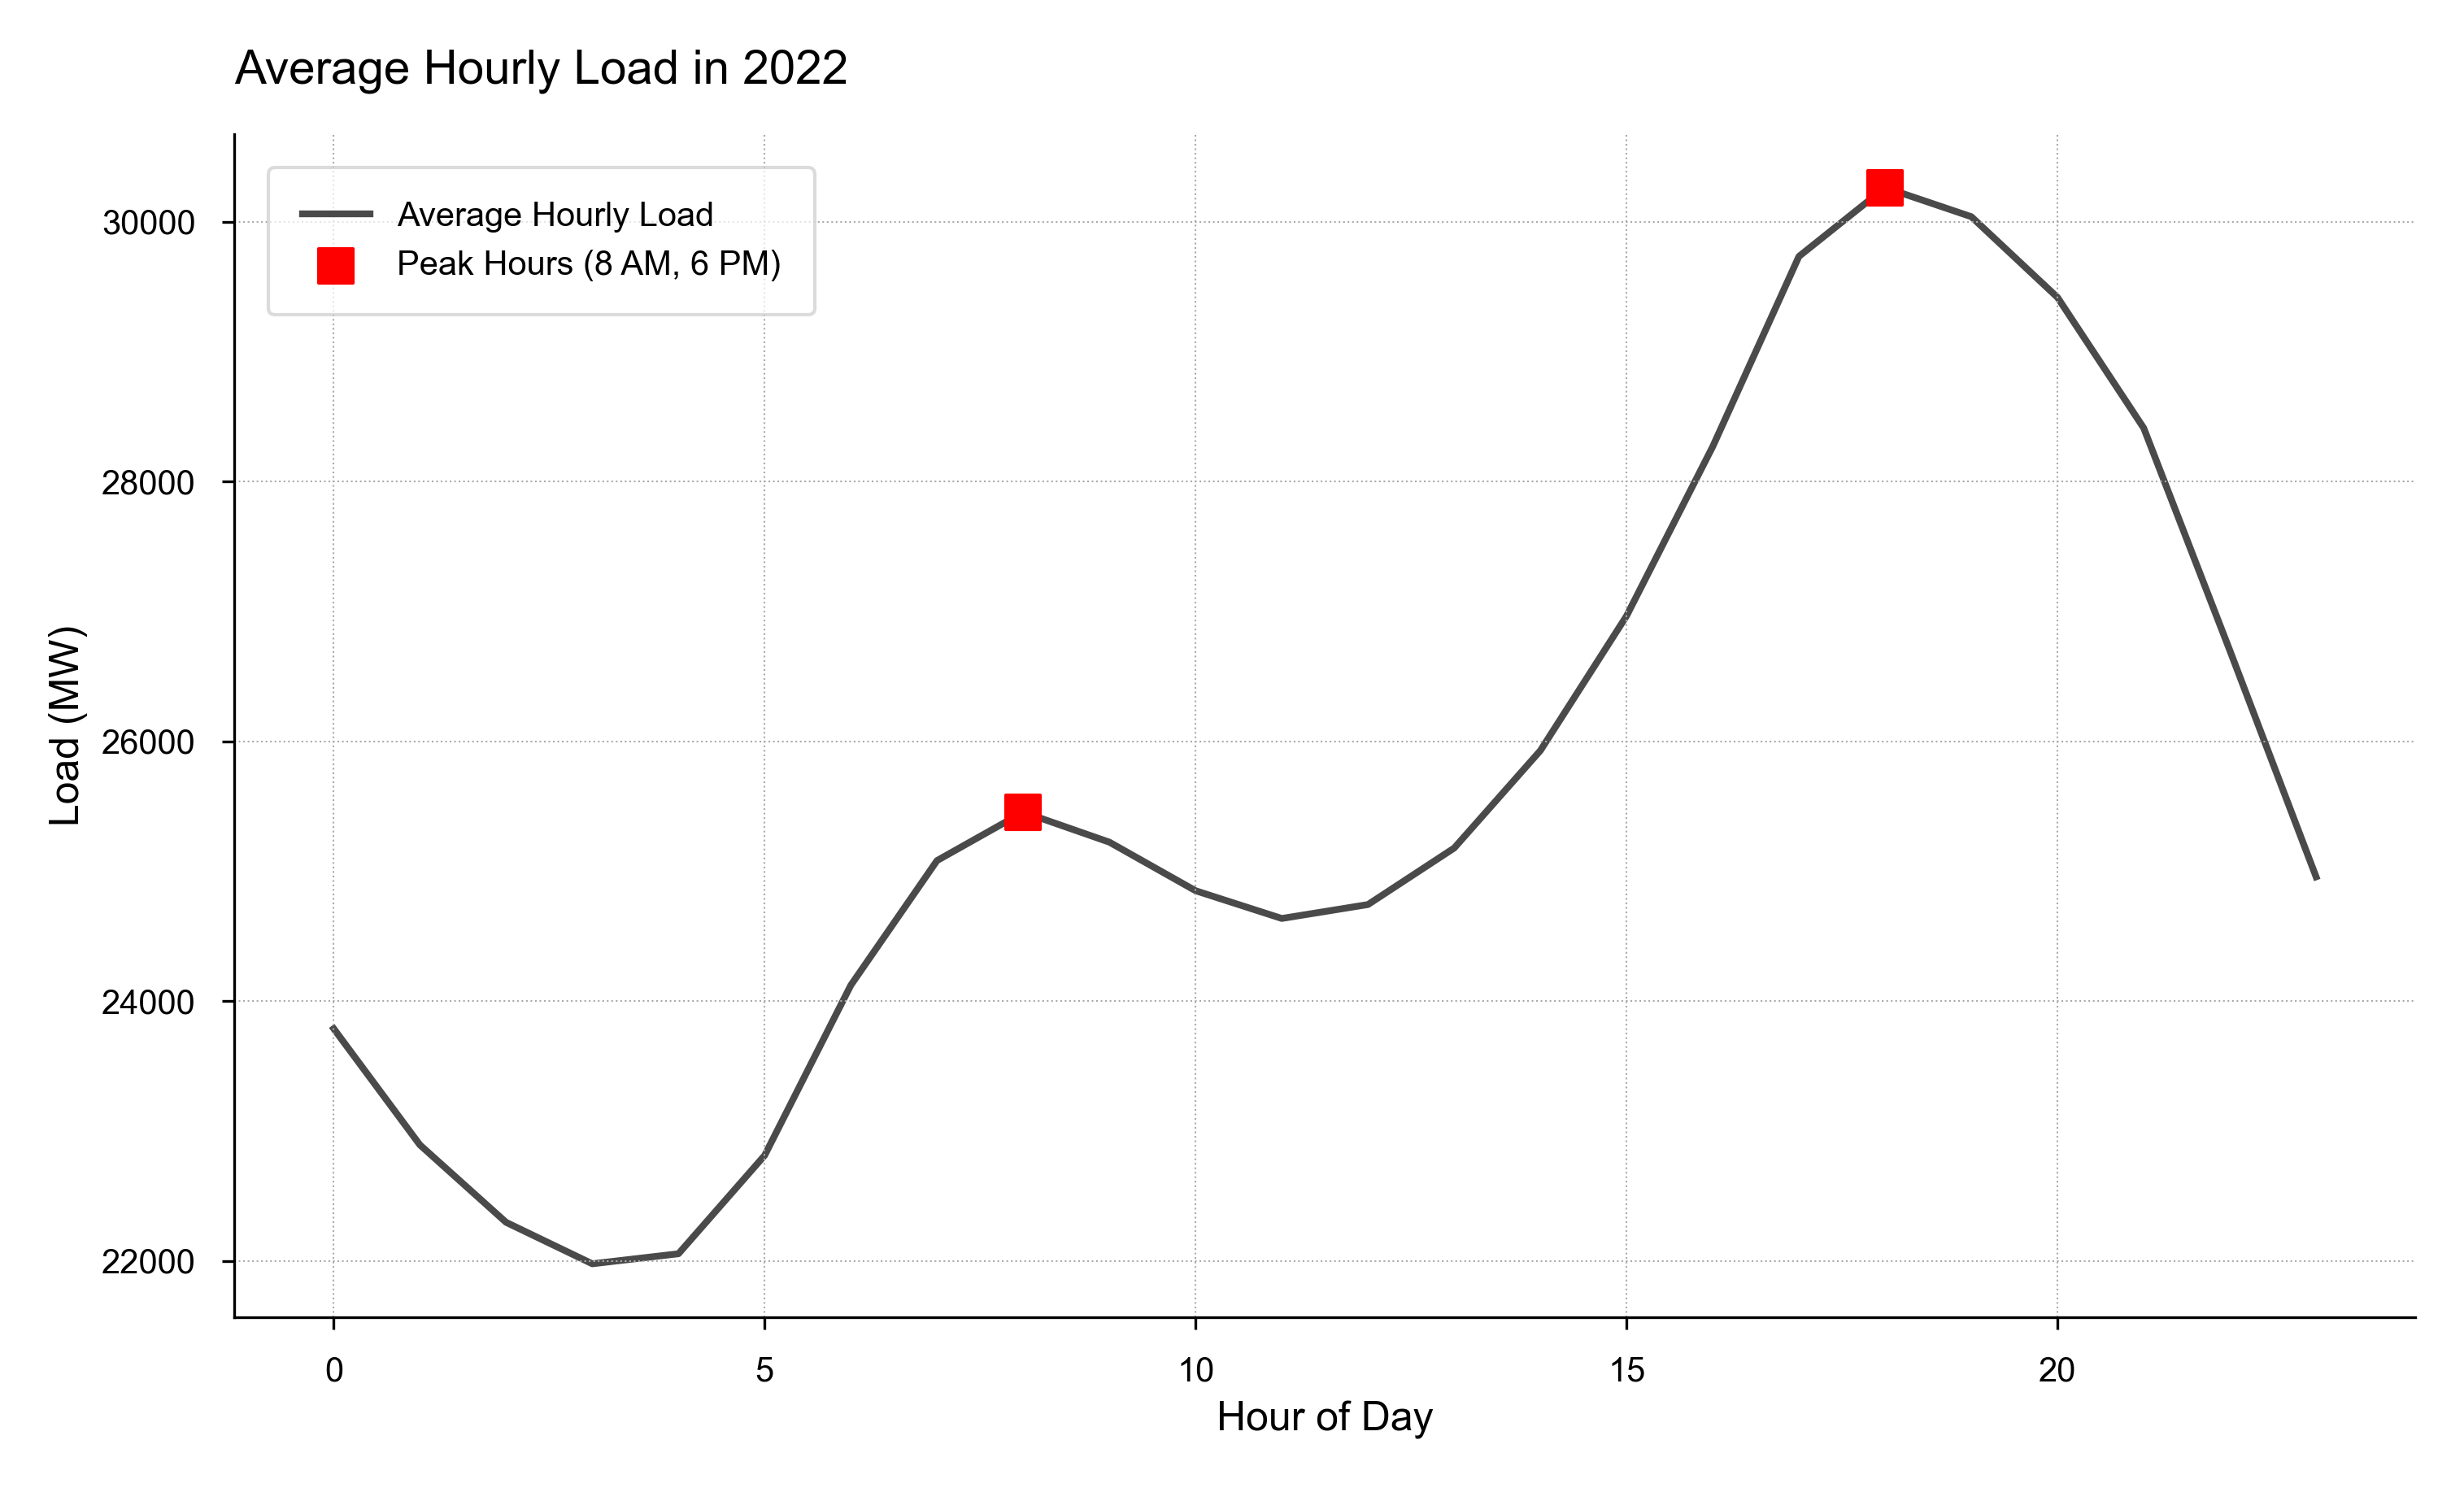

In [96]:
# line plot of average load by hour
plt.figure(figsize=(10, 6))
# plt.scatter(df["hour"], df["CAISO"], alpha=0.2, zorder = 0)
plt.plot(df_2022_hour_avg["hour"], df_2022_hour_avg["CAISO"], label="Average Hourly Load", marker="o", linewidth=2, zorder = 1, markersize=0)
plt.scatter([8, 18], df_2022_hour_avg[df_2022_hour_avg["hour"].isin([8, 18])]["CAISO"], color="red", marker="s", s=100, alpha=1.0, label="Peak Hours (8 AM, 6 PM)", zorder = 2)
plt.title("Average Hourly Load in 2022", loc="left", fontweight="regular")
plt.xlabel("Hour of Day")
plt.ylabel("Load (MW)")
plt.legend(frameon=True, fontsize=10, framealpha=0.7, borderpad=1)
plt.show()

# # line plot of average load by hour
# plt.figure(figsize=(10, 6))
# # plt.scatter(df["hour"], df["CAISO"], alpha=0.2, zorder = 0)
# plt.plot(df_2023_hour_avg["hour"], df_2023_hour_avg["CAISO"], label="Average Hourly Load", marker="s", linewidth=2, zorder = 1, markersize=7)
# plt.scatter([8, 18], df_2023_hour_avg[df_2023_hour_avg["hour"].isin([8, 18])]["CAISO"], color="red", marker="s", s=100, alpha=1.0, label="Peak Hours (8 AM, 6 PM)", zorder = 2)
# plt.title("Average Hourly Load in 2022")
# plt.xlabel("Hour of Day")
# plt.ylabel("Load (MW)")
# plt.legend()
# plt.show()


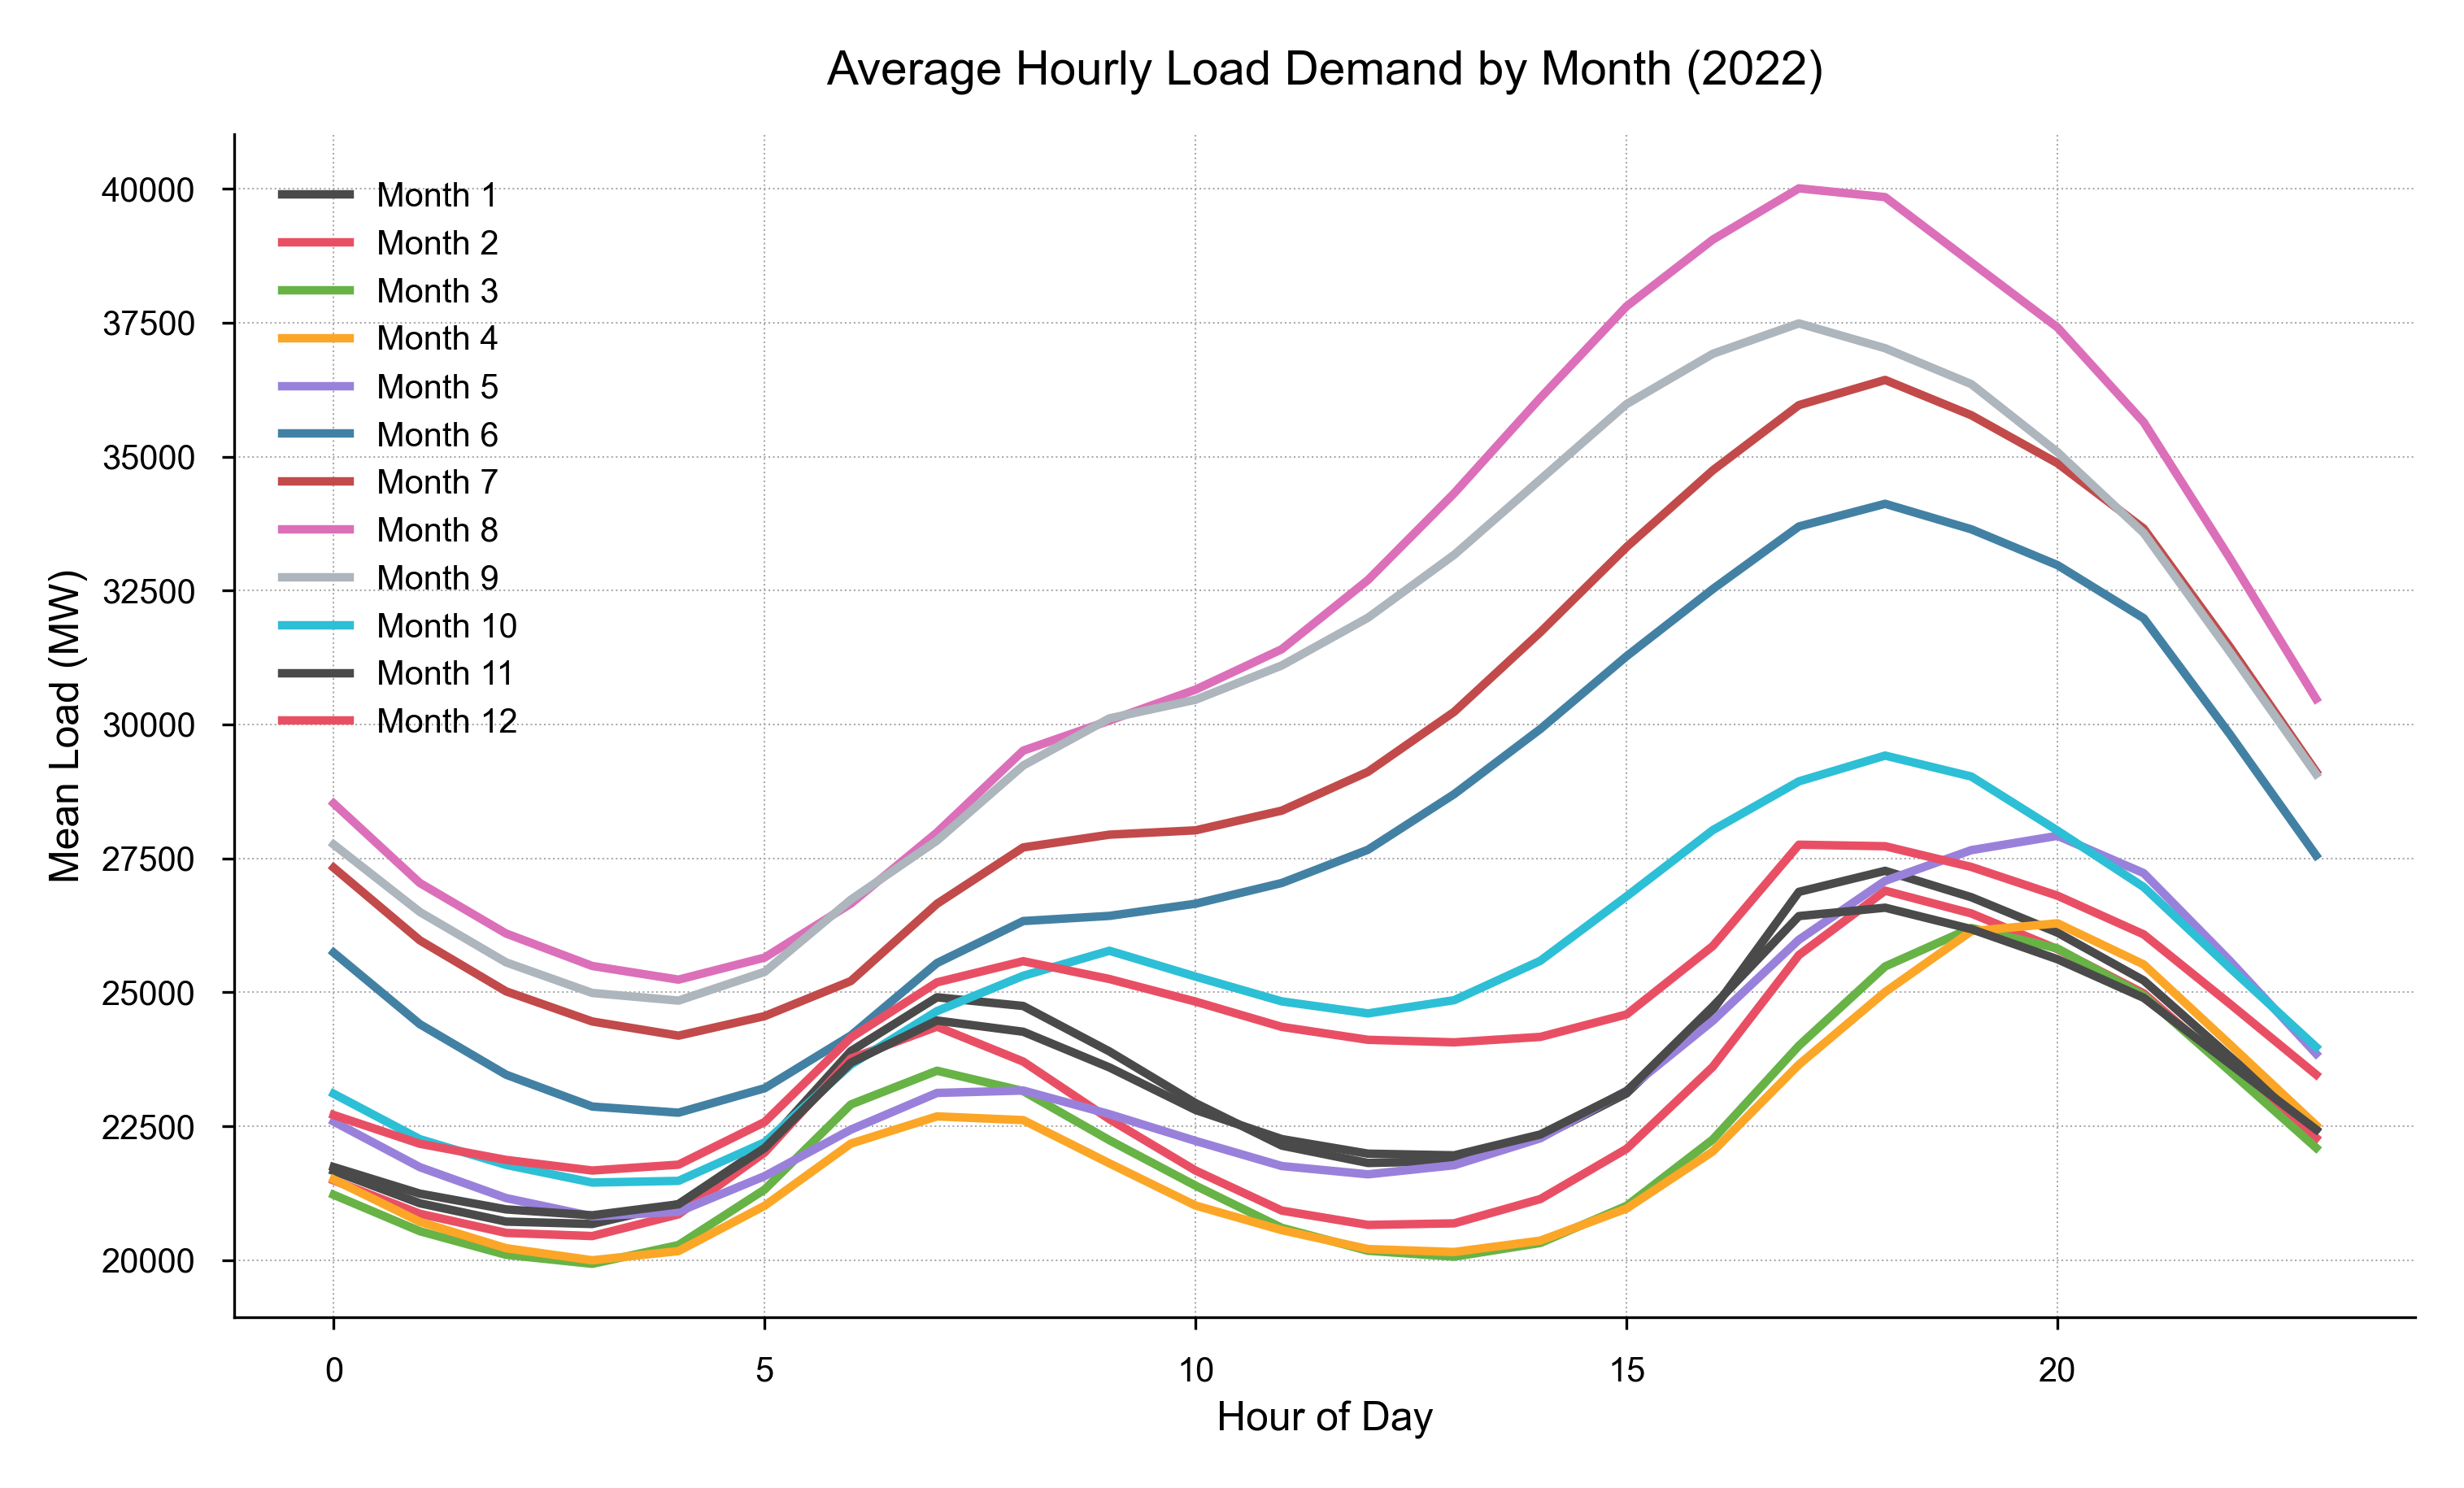

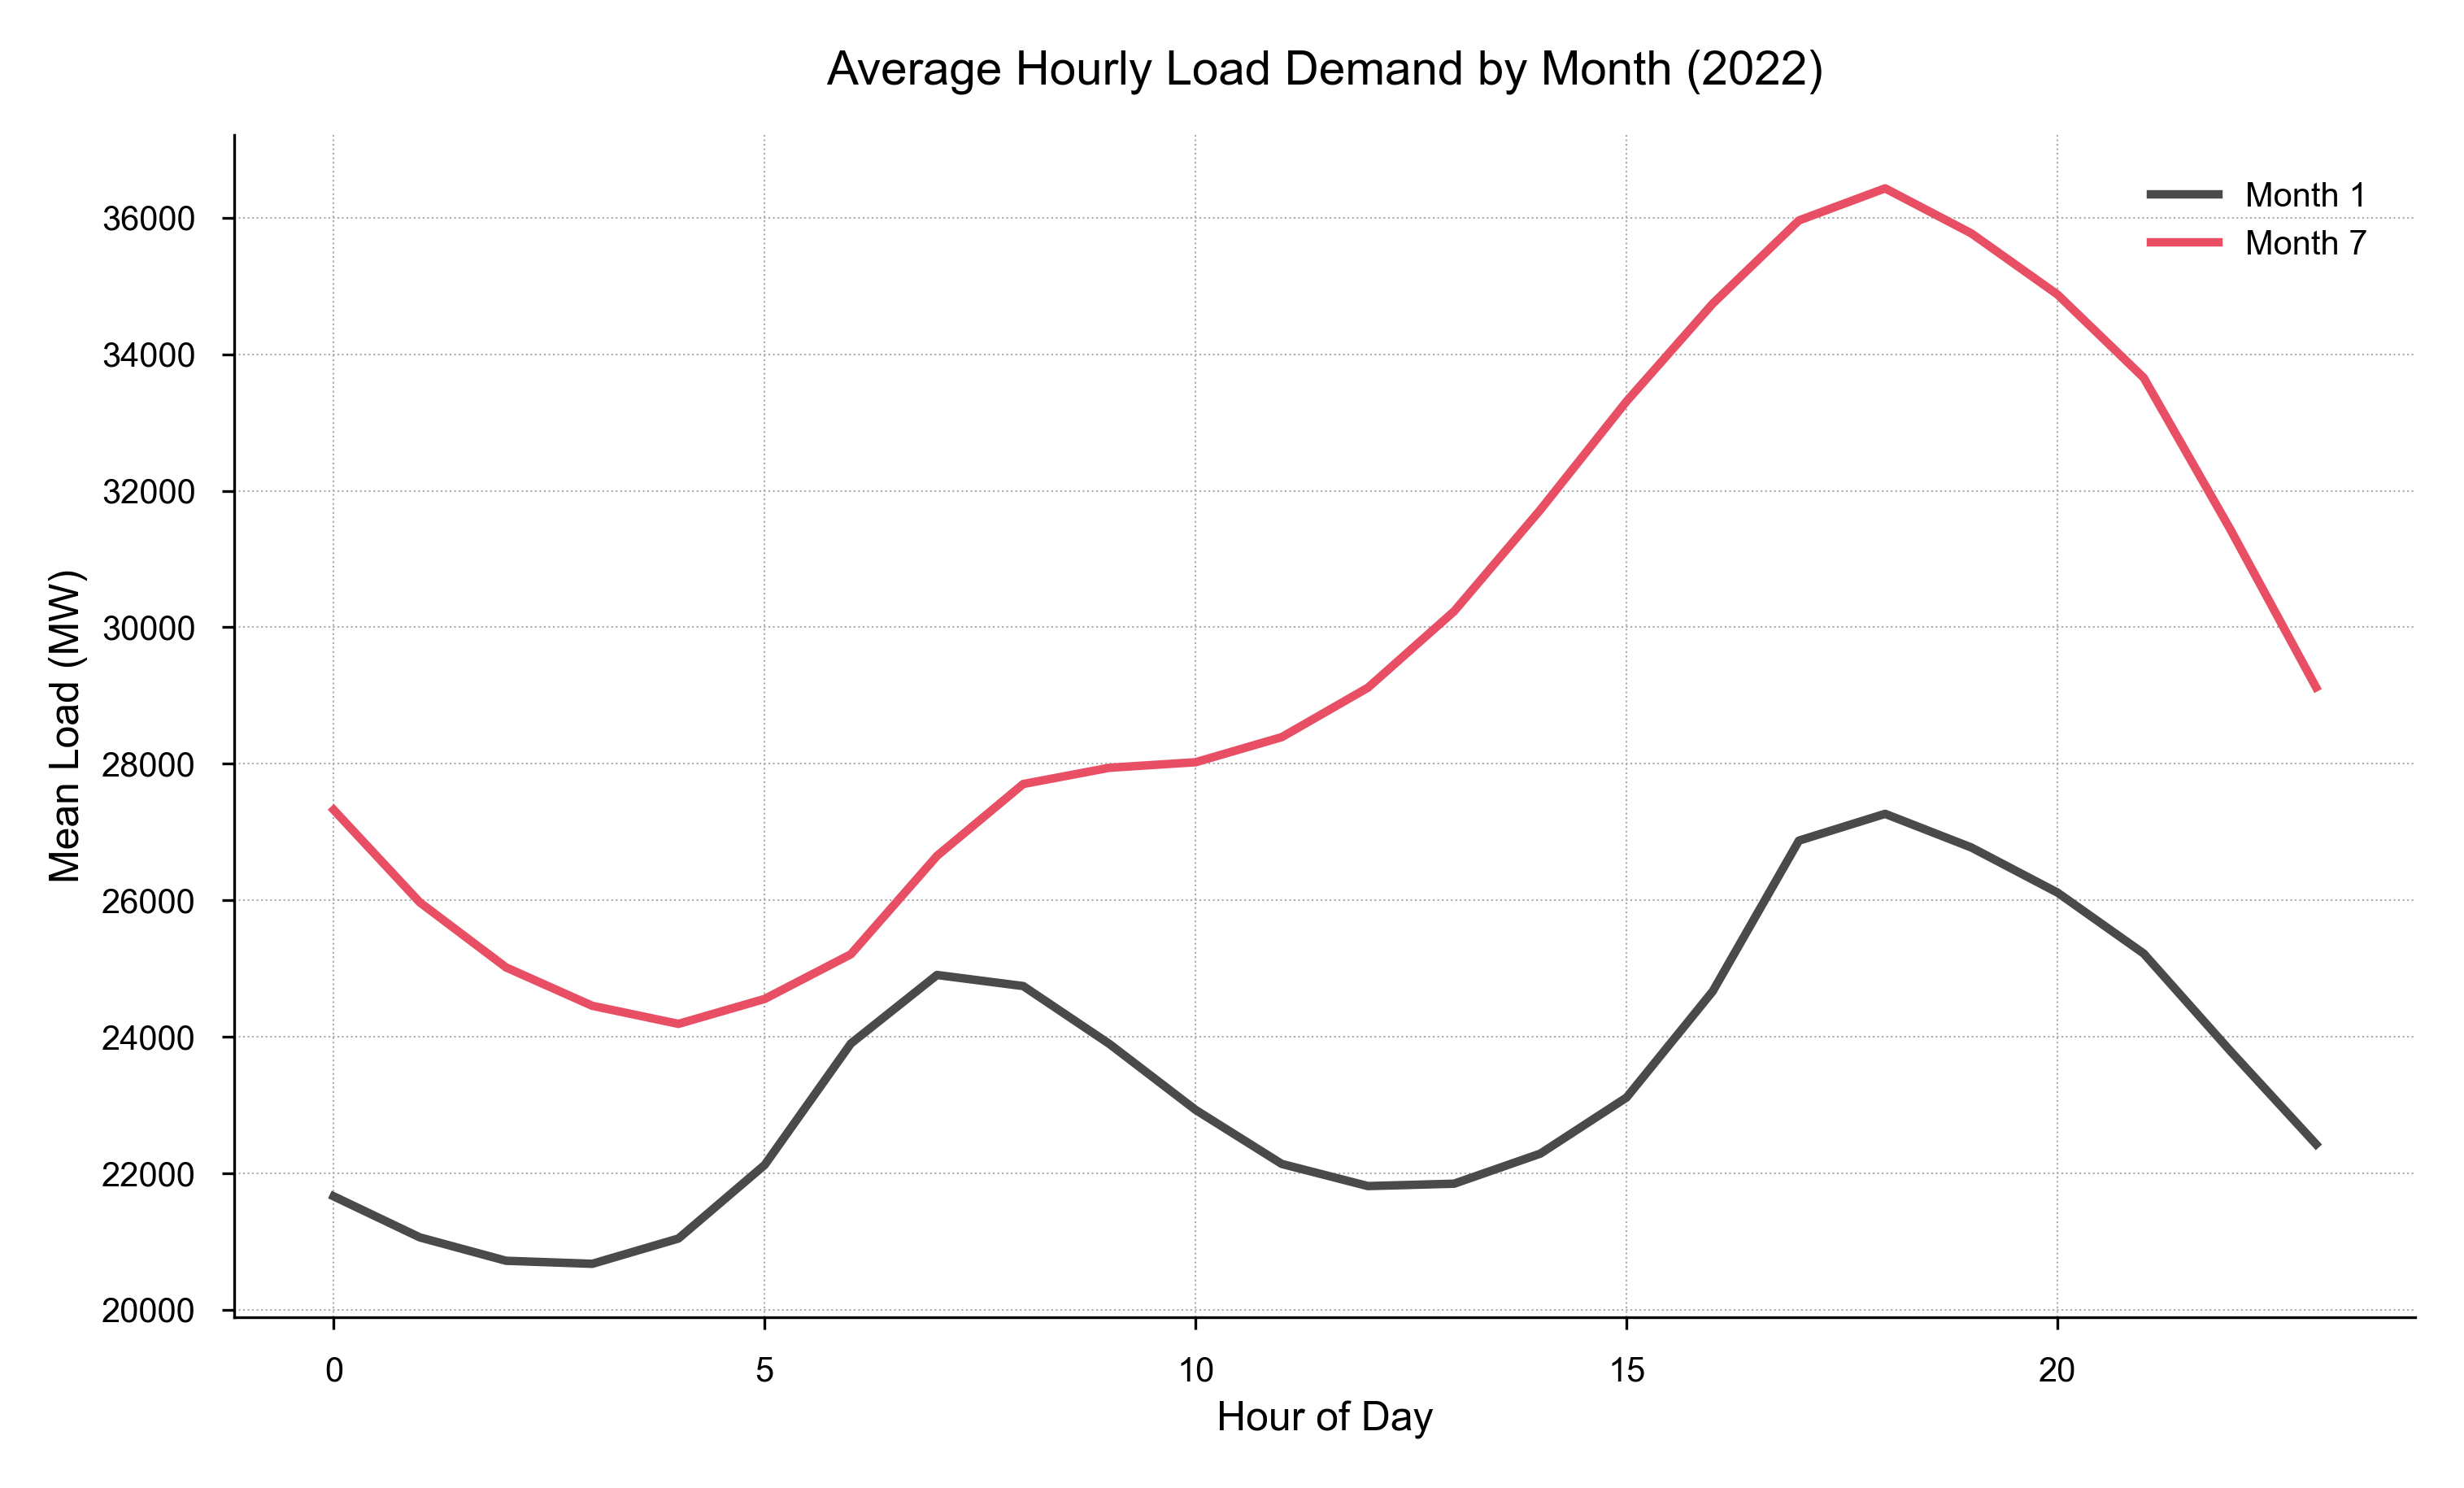

In [29]:
# plot line for each month
plt.figure(figsize=(10, 6))
for month in range(1, 13):
    monthly_data = df_2022_month_avg[df_2022_month_avg["month"] == month]
    plt.plot(monthly_data["hour"], monthly_data["CAISO"], label=f"Month {month}")
plt.title("Average Hourly Load Demand by Month (2022)")
plt.xlabel("Hour of Day")
plt.ylabel("Mean Load (MW)")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for month in [1, 7]:
    monthly_data = df_2022_month_avg[df_2022_month_avg["month"] == month]
    plt.plot(monthly_data["hour"], monthly_data["CAISO"], label=f"Month {month}")
plt.title("Average Hourly Load Demand by Month (2022)")
plt.xlabel("Hour of Day")
plt.ylabel("Mean Load (MW)")
plt.legend()
plt.show()

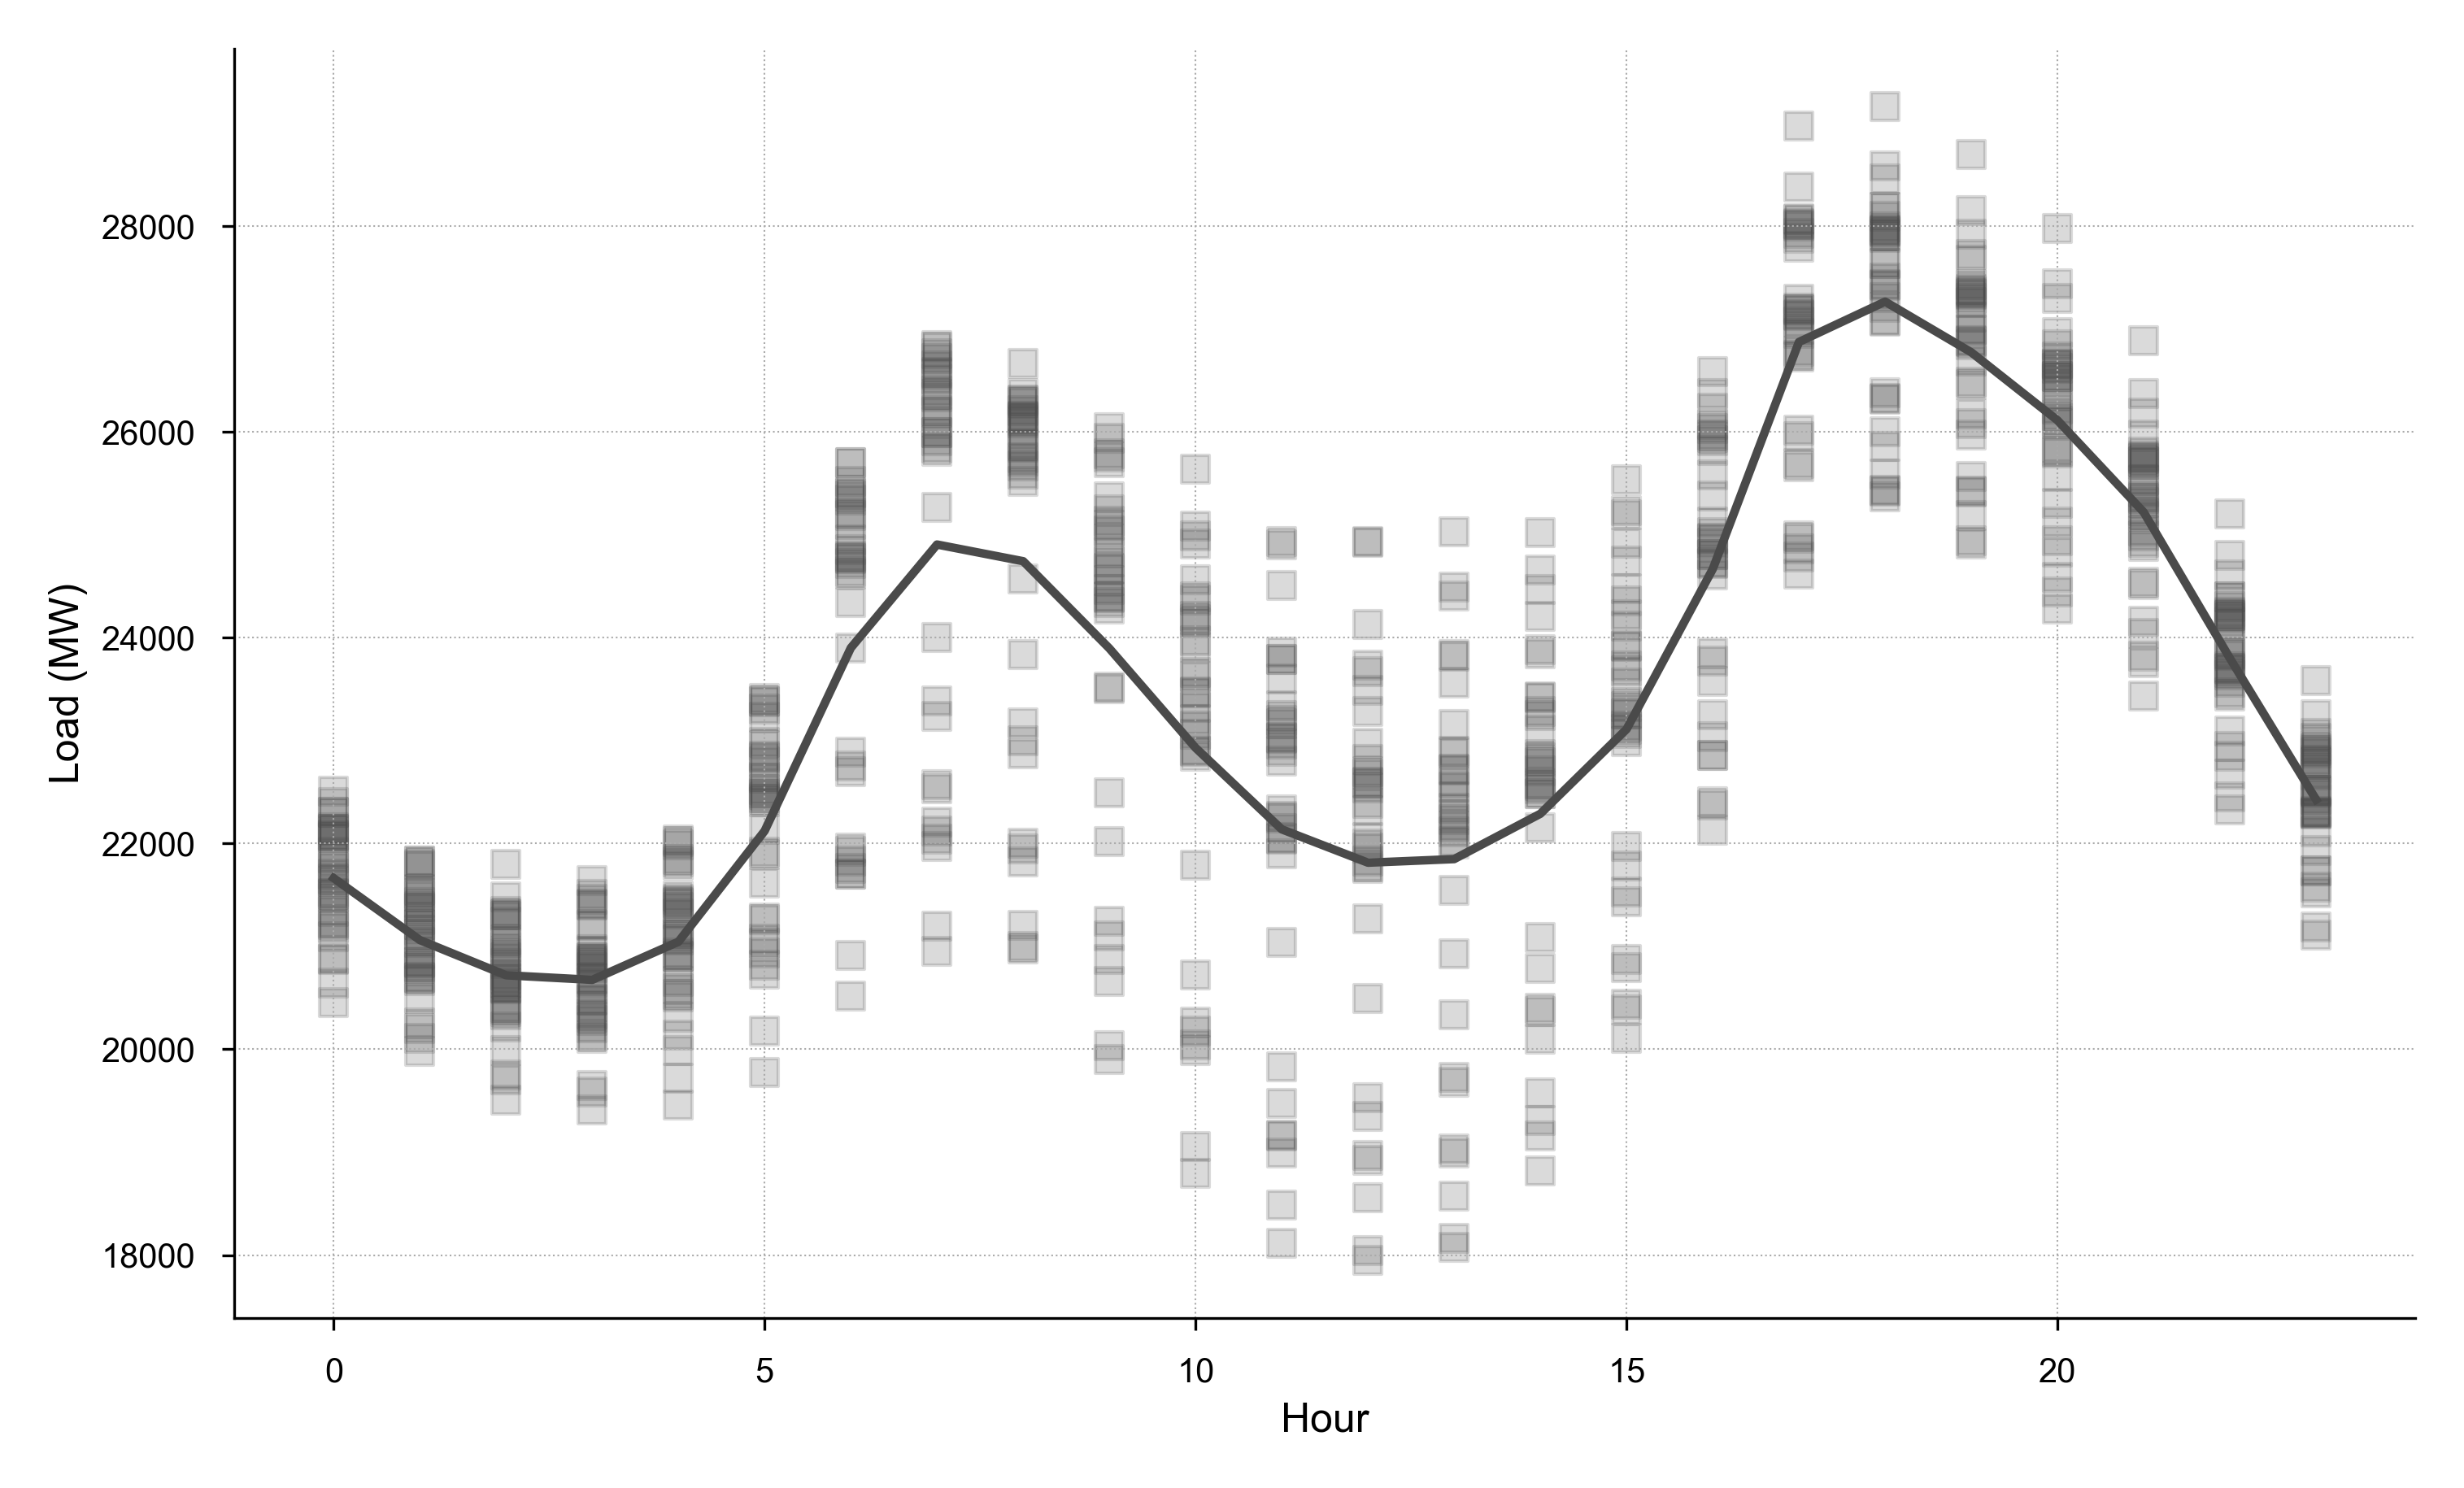

In [30]:
# plot line line chart
plt.figure(figsize=(10, 6))

plt.scatter(df_2022_jan["hour"], df_2022_jan["CAISO"], alpha=0.2, marker="s")
plt.plot(df_2022_month_avg[df_2022_month_avg["month"] == 1]["hour"], df_2022_month_avg[df_2022_month_avg["month"] == 1]["CAISO"], label="Mean")


# plt.title("Hourly Load Demand")
plt.xlabel("Hour")
plt.ylabel("Load (MW)")

plt.show()

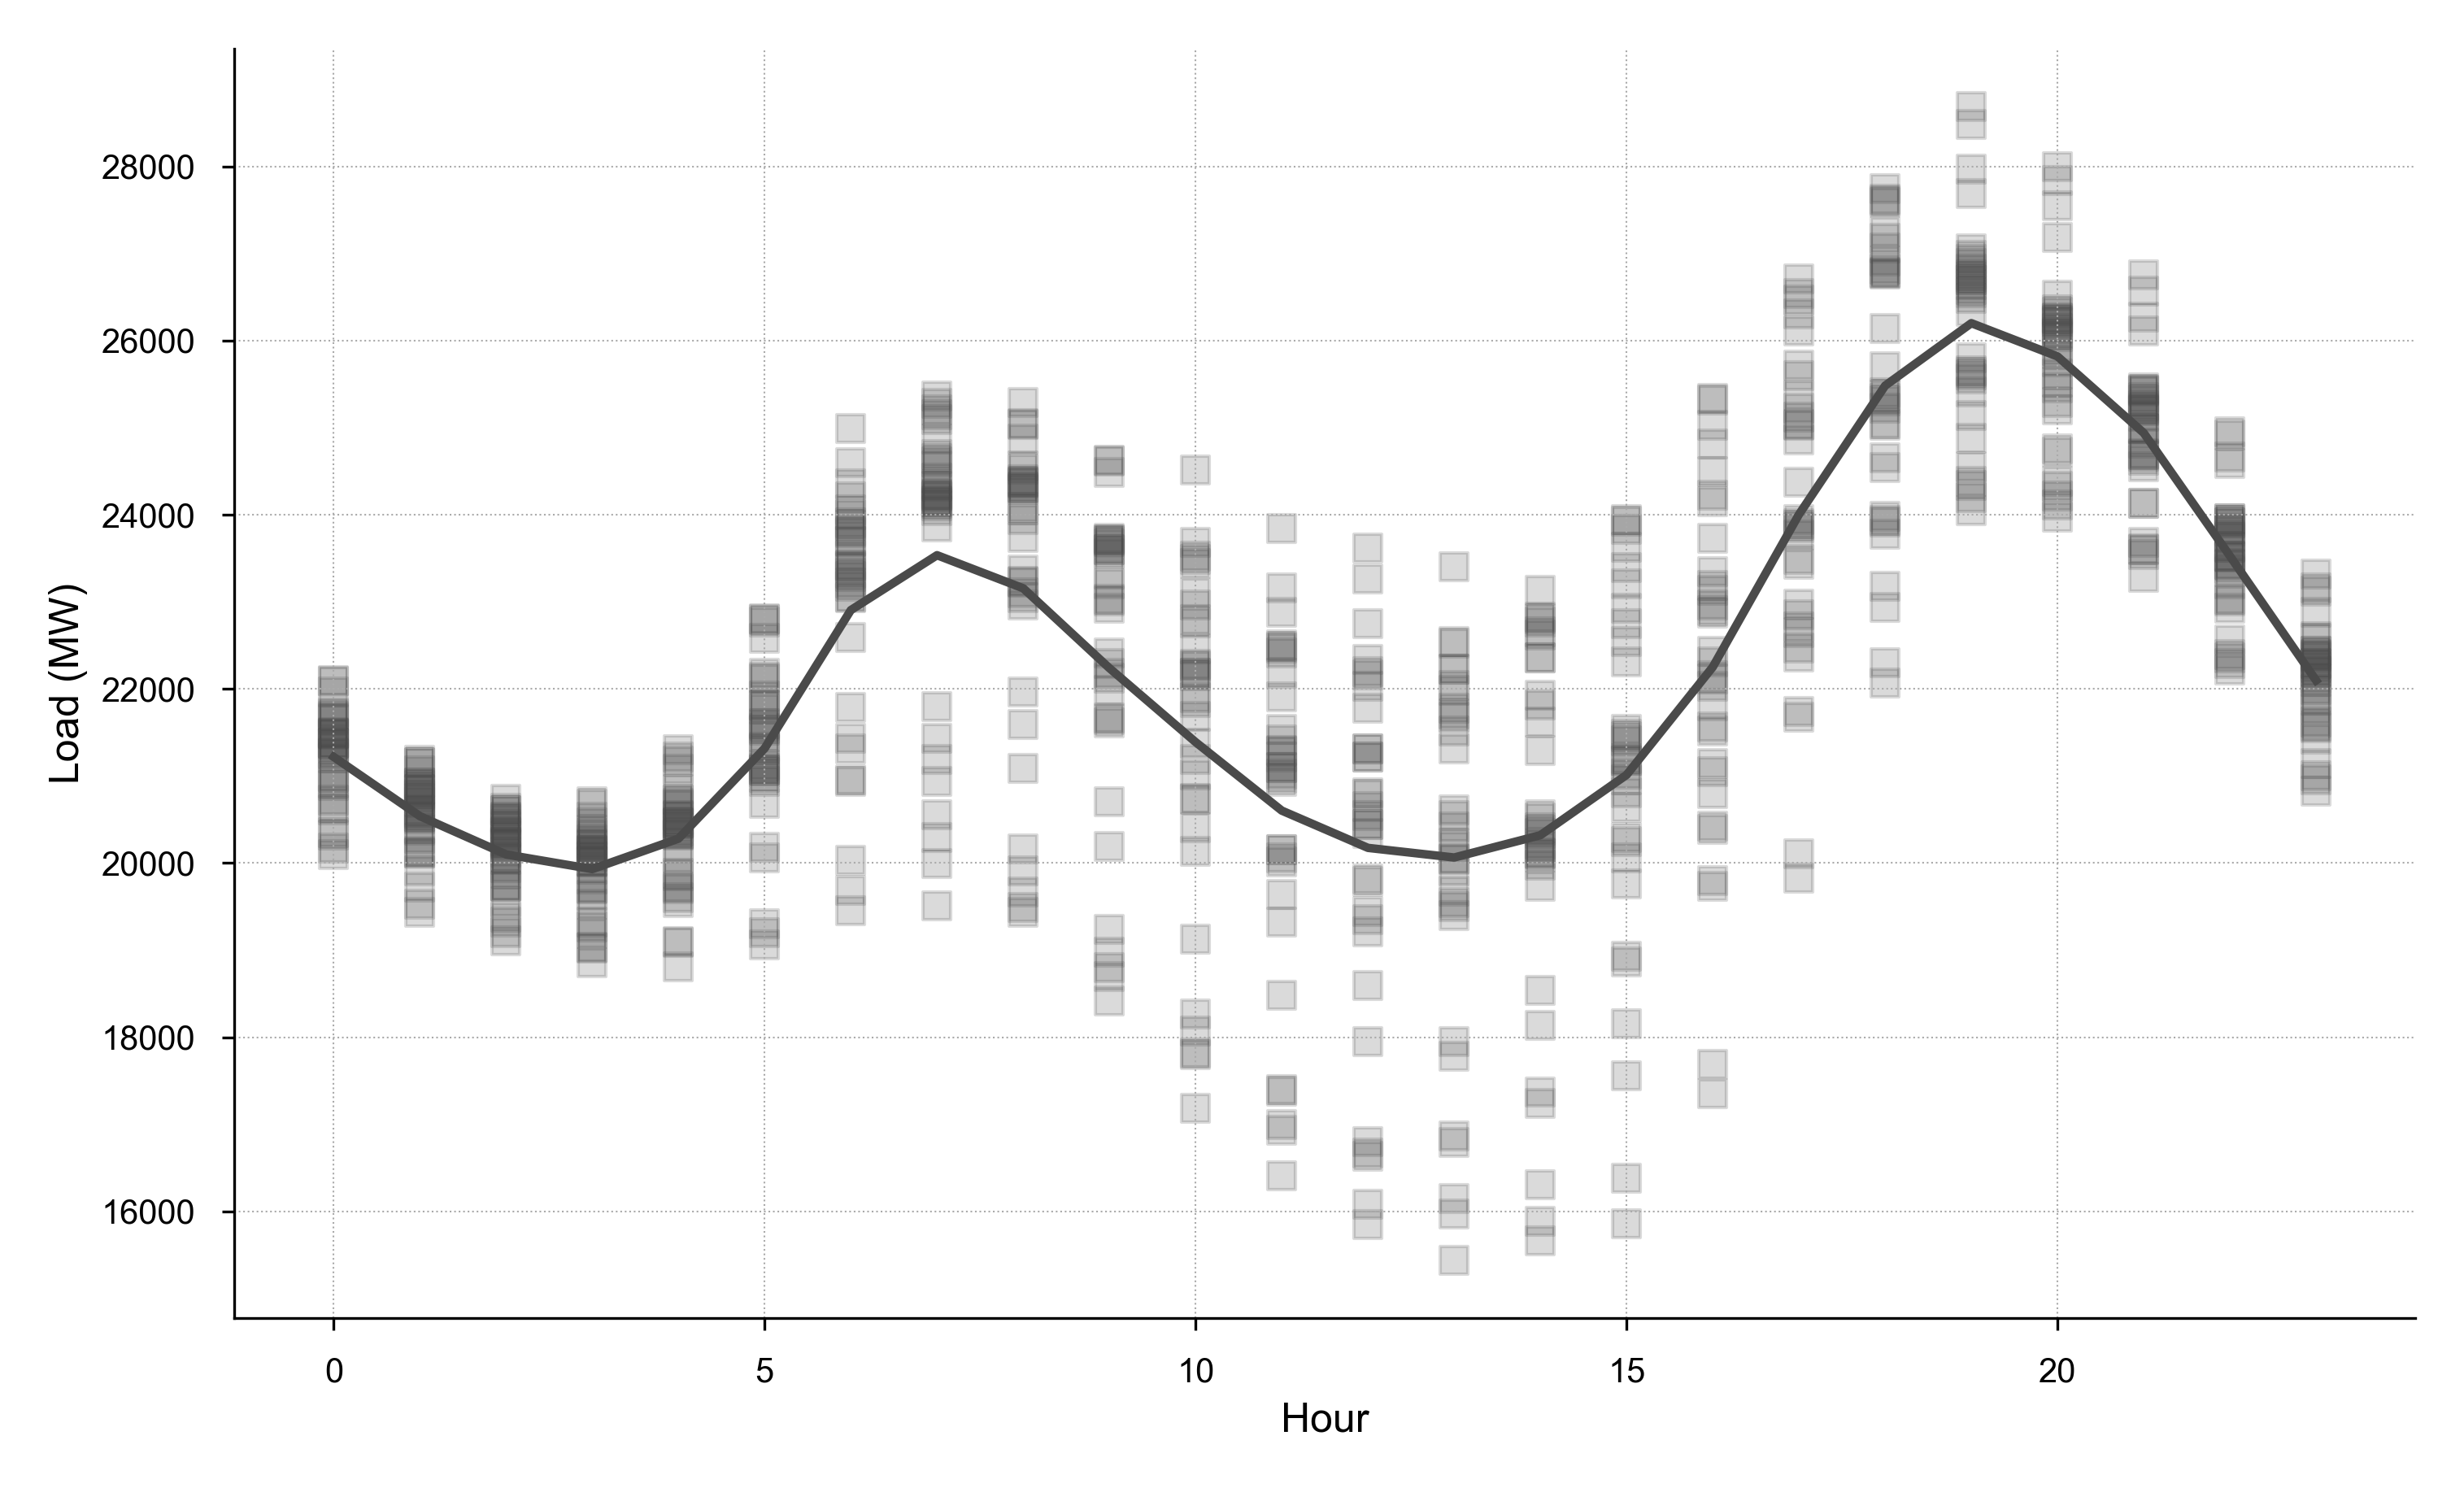

In [31]:
plt.figure(figsize=(10, 6))

plt.scatter(df_2022_march["hour"], df_2022_march["CAISO"], alpha=0.2, marker="s")
plt.plot(df_2022_month_avg[df_2022_month_avg["month"] == 3]["hour"], df_2022_month_avg[df_2022_month_avg["month"] == 3]["CAISO"], label="Mean")
# plt.title("Hourly Load Demand")
plt.xlabel("Hour")
plt.ylabel("Load (MW)")

plt.show()

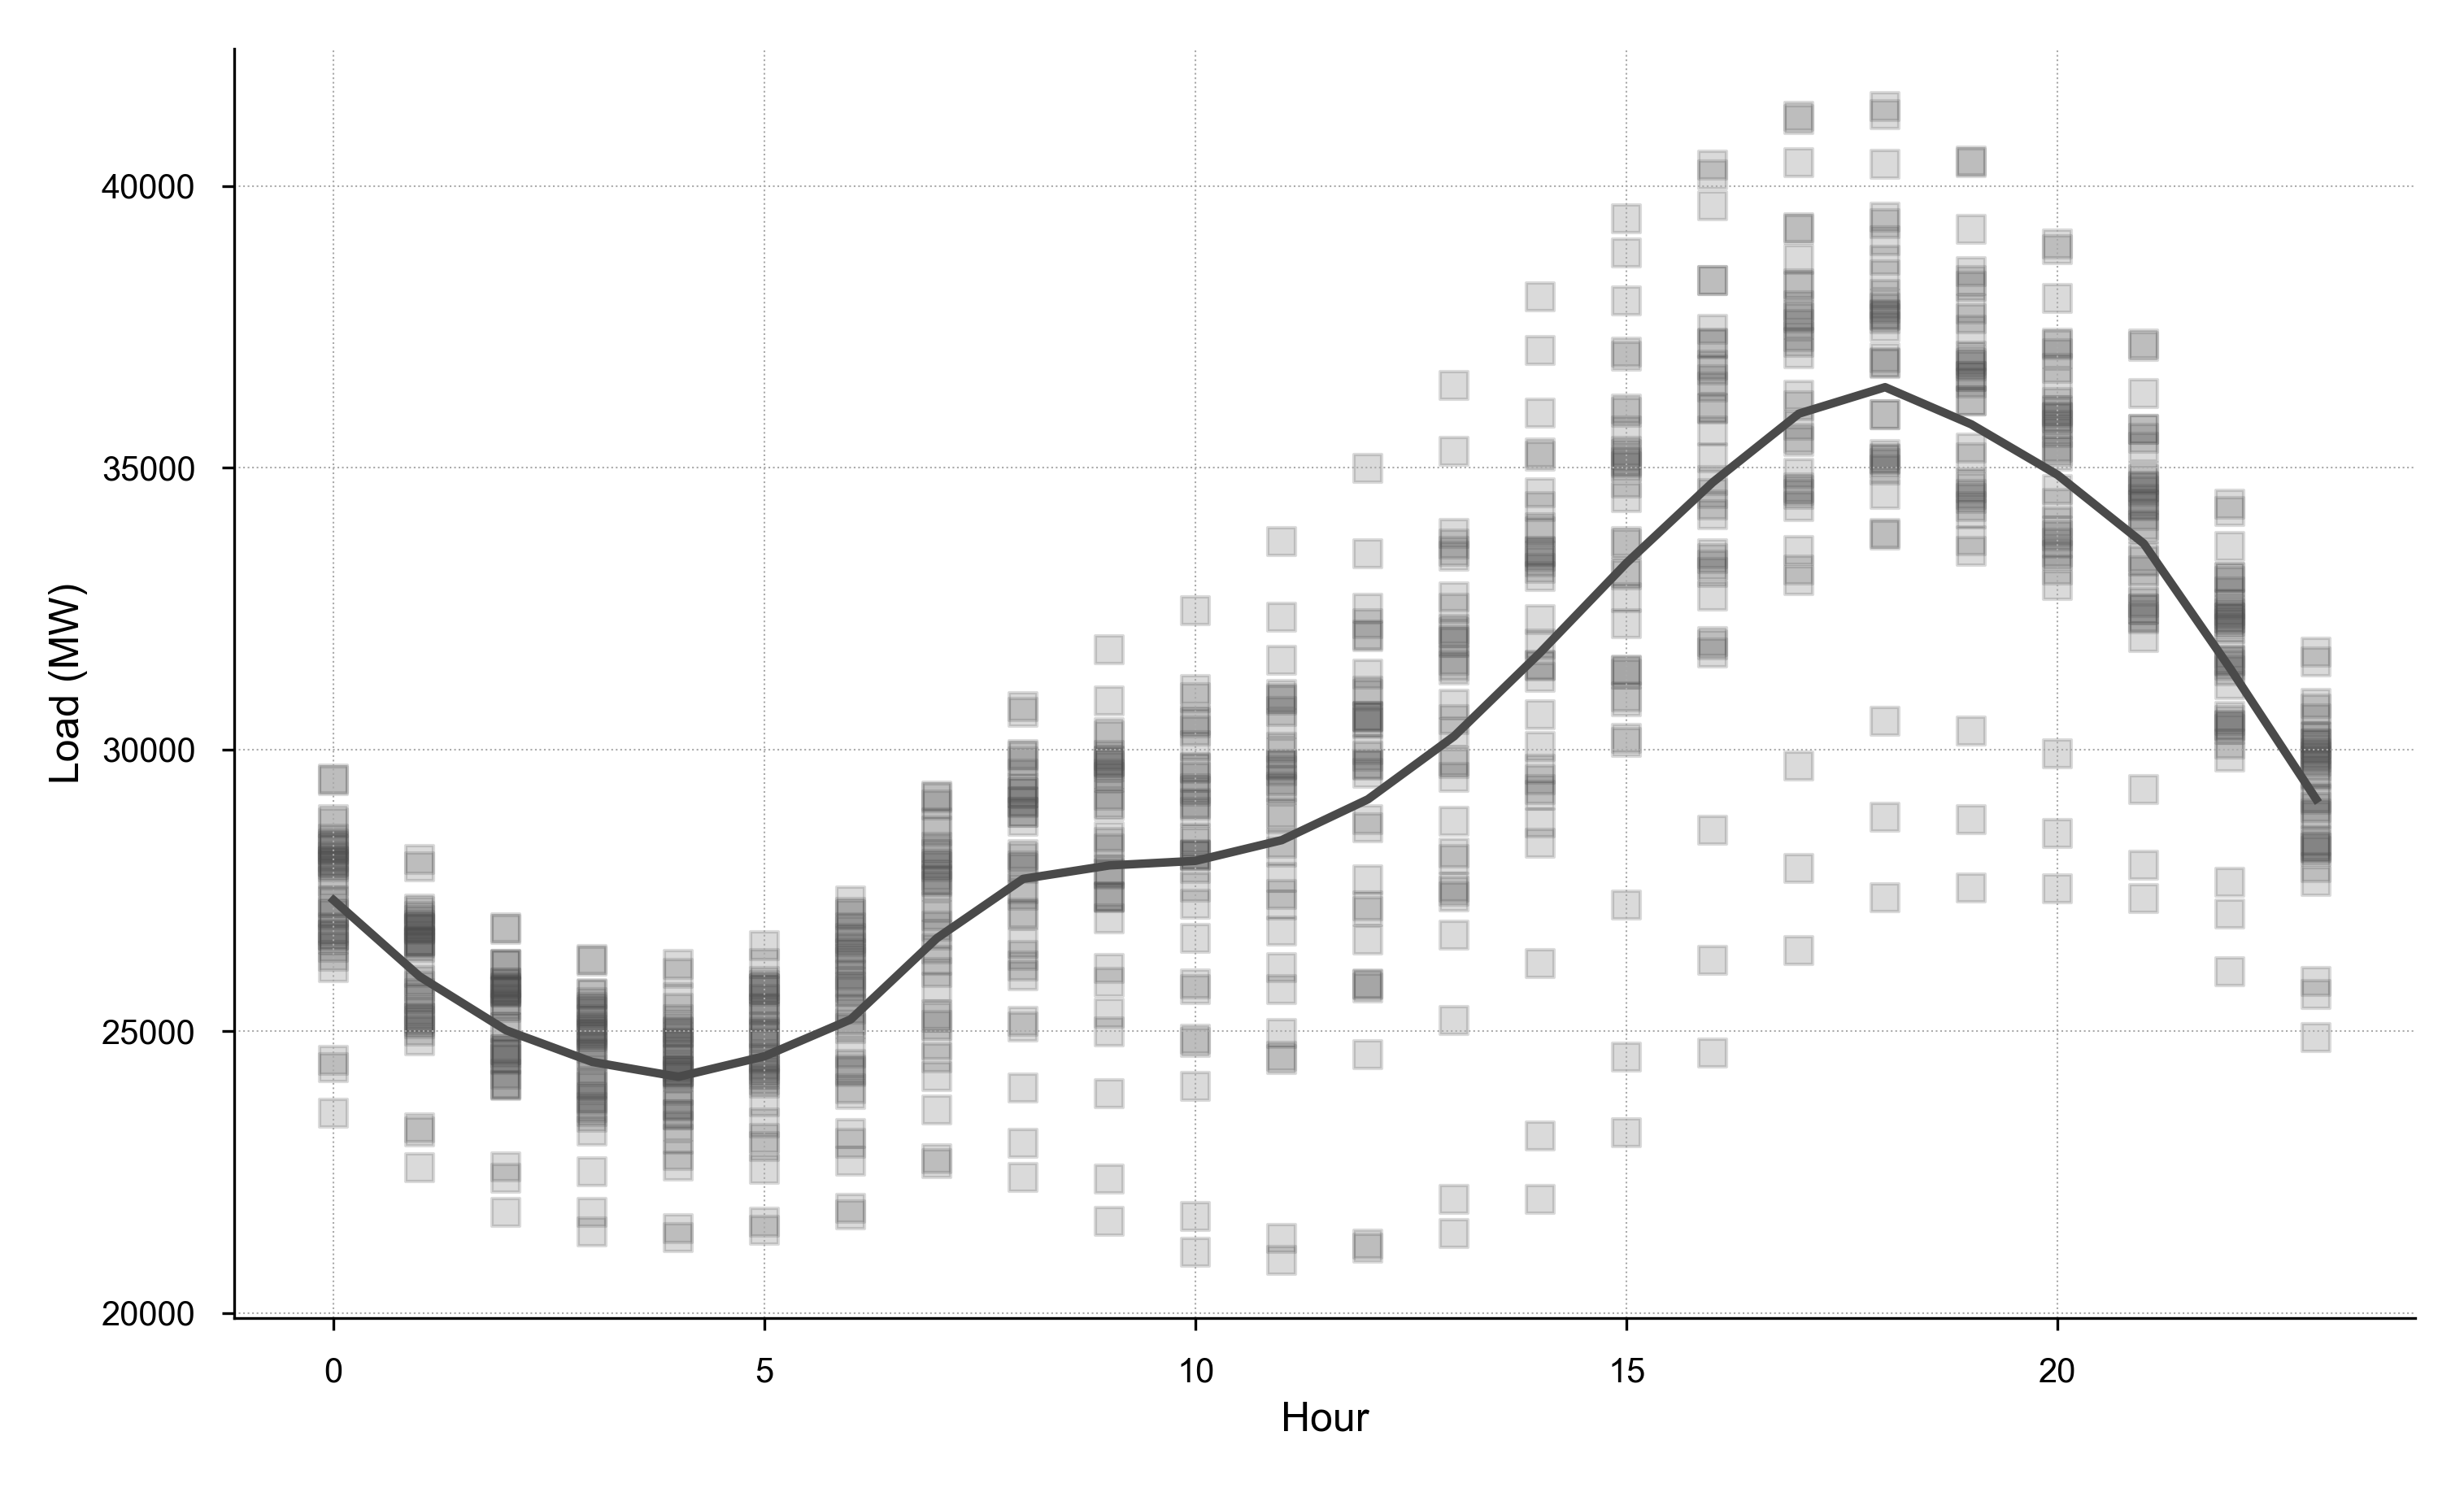

In [32]:
plt.figure(figsize=(10, 6))

plt.scatter(df_2022_july["hour"], df_2022_july["CAISO"], alpha=0.2, marker="s")
plt.plot(df_2022_month_avg[df_2022_month_avg["month"] == 7]["hour"], df_2022_month_avg[df_2022_month_avg["month"] == 7]["CAISO"], label="Mean")
# plt.title("Hourly Load Demand")
plt.xlabel("Hour")
plt.ylabel("Load (MW)")

plt.show()

In [33]:
# # plot histogram
# plt.figure(figsize=(8, 6))
# plt.hist(df[df["HR"] == 3]["CAISO"], bins=50, alpha=0.7)
# plt.show()

# plt.figure(figsize=(8, 6))
# plt.hist(df[df["HR"] == 15]["CAISO"], bins=50, alpha=0.7)
# plt.show()